<a href="https://colab.research.google.com/github/devarshi167/Cardiovascular-Risk-Prediction-MLC/blob/main/Copy_of_Copy_of_Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Cardiovascular Risk Prediction

---


### **Project Type**    - ML Classification


---




#### **Contribution**    - Team

##### **Team Member 1** -Devarshi Dwivedi
##### **Team Member 2** -Jay Pardeshi
##### **Team Member 3** -Priyadarshini Gaikwad
##### **Team Member 4** -Samarjeet singh


## **Problem Statement**

---



The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes. 

## **Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


---




## **Dataset Description**


---



### **Demographic:**
• Sex: male or female("M" or "F")

• Age: Age of the patient

### **Behavioral:**
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.


### **Medical( history):**
• BP Meds: whether or not the patient was on blood pressure medication 

• Prevalent Stroke: whether or not the patient had previously had a stroke 

• Prevalent Hyp: whether or not the patient was hypertensive 

• Diabetes: whether or not the patient had diabetes 


### **Medical(current):**
• Tot Chol: total cholesterol level

• Sys BP: systolic blood pressure

• Dia BP: diastolic blood pressure 

• BMI: Body Mass Index 

• Heart Rate: heart rate 

• Glucose: glucose level 


### **Predict variable (desired target)**
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Project Description -**


---



Heart disease is the major cause of morbidity and mortality globally: 

It accounts for more deaths annually than any other cause. According to the
World Health Organizartion, an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Of all heart diseases, coronary heart disease is by far
the most common and the most fatal. In the United States, for example, it
is estimated that someone has a heart attack every 40 seconds and about
805,000 Americans have a heart attack every year (CDC 2019).

Doctors and scientists alike have turned to machine learning (ML)
techniques to develop screening tools and this is because of their
superiority in pattern recognition and classification as compared to other
traditional statistical approaches.

In this project, We will be giving a walk through on the development
of a screening tool for predicting whether a patient has a 10-year risk of
developing coronary heart disease(CHD) using different Machine Learning
techniques.

## **Coronary heart disease**


---



Coronary heart disease occurs when the flow of oxygen-rich blood to the heart muscle is blocked or reduced.

This puts an increased strain on the heart, and can lead to:

- angina – chest pain caused by restricted blood flow to the heart muscle
- heart attacks – where the blood flow to the heart muscle is suddenly blocked
- heart failure – where the heart is unable to pump blood around the body properly


---



## **CAUSES**


---


- High blood pressure

- Smoking

- High cholesterol

- Diabetes

- Inactivity

- Being overweight or obese


---



## **So, where does machine learning fit in ?**


---


Due to the multi-contributory risk factors such as high blood pressure, high cholesterol, diabetes and various others it gets very constrained to identify the risk factors for some of the patients. That's why we are turning to data visualization and machine learning for predicting the disease to avert the risks.
Machine learning (ML), due to its distinction in pattern detection and classification, proves to be effective in assisting decision making and risk assessment from the large quantity of data produced by the healthcare industry on heart disease.

# **GitHub Link -**


---



[Cardiovascular-Risk-Prediction](https://github.com/devarshi167/Cardiovascular-Risk-Prediction-MLC)


## **Dataset Overview**


---



### **Importing Libraries**

In [ ]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

## **Loading Dataset**


---



In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading dataset

path = '/content/drive/MyDrive/Cardiovascular Risk Prediction ML classification Devarshi Dwivedi/data_cardiovascular_risk.csv'

In [ ]:
df = pd.read_csv(path , index_col = "id")

### **Dataset First View**


---



In [ ]:
# first 5 entries

df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
id                                                                       
0    64        2.0   F        YES         3.0     0.0                0   
1    36        4.0   M         NO         0.0     0.0                0   
2    46        1.0   F        YES        10.0     0.0                0   
3    50        1.0   M        YES        20.0     0.0                0   
4    64        1.0   F        YES        30.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
id                                                                             
0              0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1              1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2              0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3              1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4              0         0    241.0  136.5   85.0  26.42       70.0     77.0   

    TenYearCHD  
id              
0            1  
1            0  
2            0  
3            1  
4            0

In [ ]:
# last 5 entries

df.tail()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
id                                                                         
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     NaN                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
id                                                                      
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
id                         
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [ ]:
# Dataset Columns 

df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **Detailed Dataset Information**


---



In [ ]:
# detailed description of our dataset.

df.describe(include='all')

age    education   sex is_smoking   cigsPerDay       BPMeds  \
count   3390.000000  3303.000000  3390       3390  3368.000000  3346.000000   
unique          NaN          NaN     2          2          NaN          NaN   
top             NaN          NaN     F         NO          NaN          NaN   
freq            NaN          NaN  1923       1703          NaN          NaN   
mean      49.542183     1.970936   NaN        NaN     9.069477     0.029886   
std        8.592878     1.019081   NaN        NaN    11.879078     0.170299   
min       32.000000     1.000000   NaN        NaN     0.000000     0.000000   
25%       42.000000     1.000000   NaN        NaN     0.000000     0.000000   
50%       49.000000     2.000000   NaN        NaN     0.000000     0.000000   
75%       56.000000     3.000000   NaN        NaN    20.000000     0.000000   
max       70.000000     4.000000   NaN        NaN    70.000000     1.000000   

        prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count       3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
unique              NaN           NaN          NaN          NaN         NaN   
top                 NaN           NaN          NaN          NaN         NaN   
freq                NaN           NaN          NaN          NaN         NaN   
mean           0.006490      0.315339     0.025664   237.074284   132.60118   
std            0.080309      0.464719     0.158153    45.247430    22.29203   
min            0.000000      0.000000     0.000000   107.000000    83.50000   
25%            0.000000      0.000000     0.000000   206.000000   117.00000   
50%            0.000000      0.000000     0.000000   234.000000   128.50000   
75%            0.000000      1.000000     0.000000   264.000000   144.00000   
max            1.000000      1.000000     1.000000   696.000000   295.00000   

              diaBP          BMI    heartRate      glucose   TenYearCHD  
count   3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean      82.883038    25.794964    75.977279    82.086520     0.150737  
std       12.023581     4.115449    11.971868    24.244753     0.357846  
min       48.000000    15.960000    45.000000    40.000000     0.000000  
25%       74.500000    23.020000    68.000000    71.000000     0.000000  
50%       82.000000    25.380000    75.000000    78.000000     0.000000  
75%       90.000000    28.040000    83.000000    87.000000     0.000000  
max      142.500000    56.800000   143.000000   394.000000     1.000000

## **Data Cleaning**


---



#### **Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count

# duplicates any ?
len(df[df.duplicated()])

0

**NO Duplicates**

#### **Missing Values/Null Values**


---



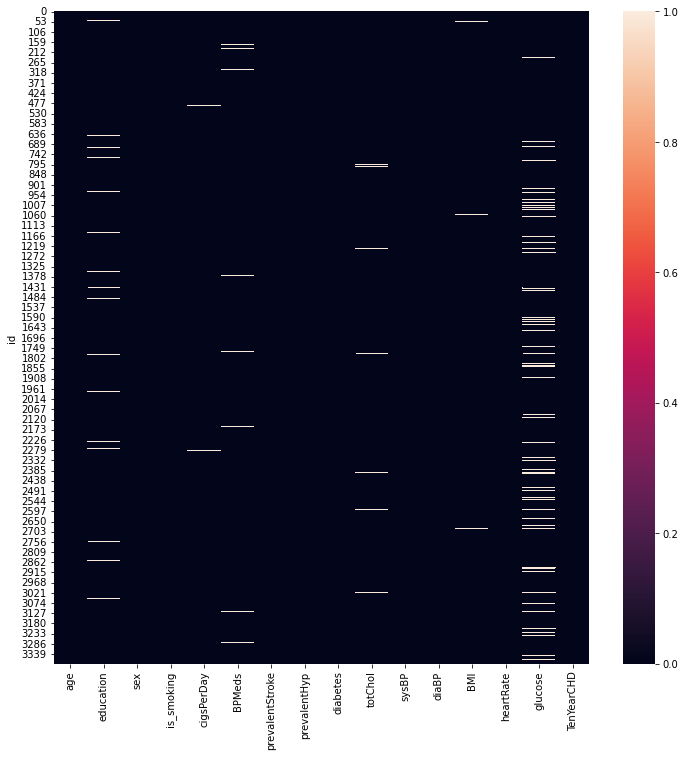

In [ ]:
# Missing Values/Null Values 

# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [ ]:
# count of missing/null values 

df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**NULL values are present in - 'glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate'.**

In [ ]:
# filling the null values with median and mode for numeric and categorical columns respectively

df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace = True)
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
# cheching the null values in our dataset

df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

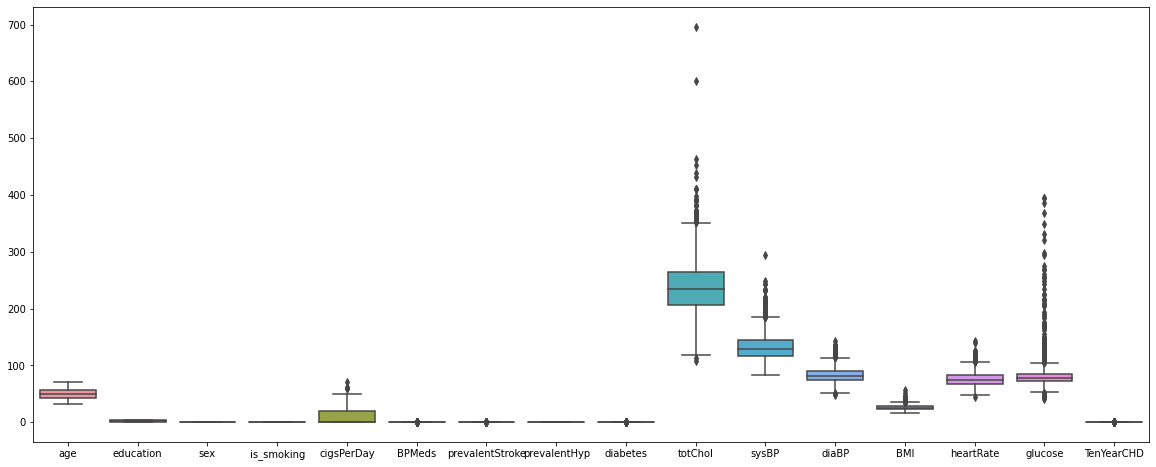

In [ ]:
# checking outliers

plt.figure(figsize=(20,8), facecolor='w')
sns.boxplot(data=df)
plt.show()


- **Outliers are present in totChol, cigsPerDay, diaBP,sysBP,hearRate,glucose.**

- **Glucose feature has highest number of outliers.**



## **Visualizing Outliers**


---



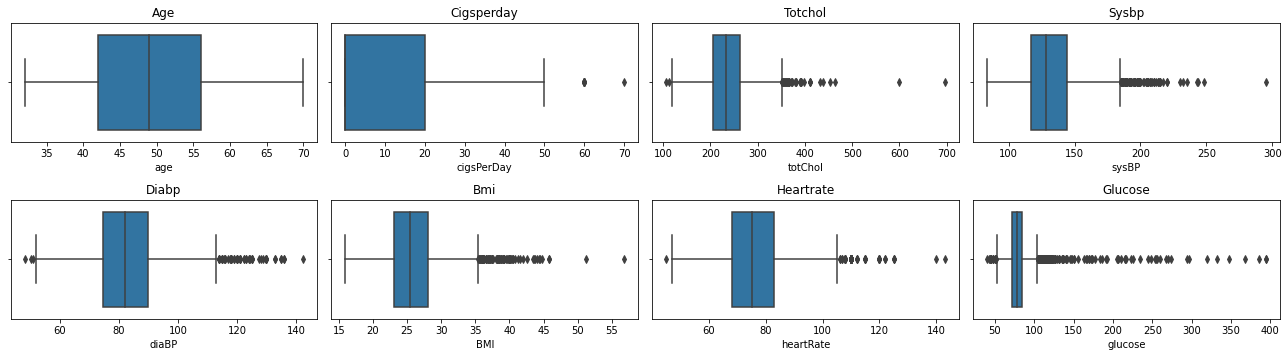

In [ ]:
# Visualization the overall data and the outliers:

plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

- Age range (30 - 70).

- cigsperday is ranging from (0 - 70).

- total cholestrol is ranging from (100 - 700).

- sysbp is ranging from (100 - 300).

- diabp is ranging from (40 - 140).

- BMI is ranging from (15 - 55).

- heart rate is ranging from (40 - 140).

- glucose level is from (40 - 400).

### **EDA and Understand the relationships between variables**


---



## **Univariate Analysis**


---



**Plotting pie chart to get the ten year risk**

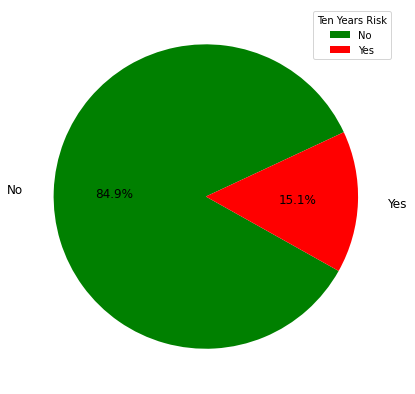

In [ ]:
#plotting pie chart to get the ten year risk

my_labels = ['No','Yes']
my_colors = ['green','red']
sizes = df['TenYearCHD'].value_counts()
fig = plt.figure(1, figsize=(7,7))
plt.pie(sizes,labels = my_labels,colors = my_colors,labeldistance = 1.2,autopct='%1.1f%%',startangle = 25, pctdistance = 0.6,textprops={'fontsize': 12} )
plt.legend(title = 'Ten Years Risk')
plt.show()

**Here we can see there are 15.1% people in our dataset are at a risk for cardiovascular disease and 84.9% people are safe**

### **Plotting to get the no of risky patients**

Text(0.5, 1.0, 'prevalentStroke')

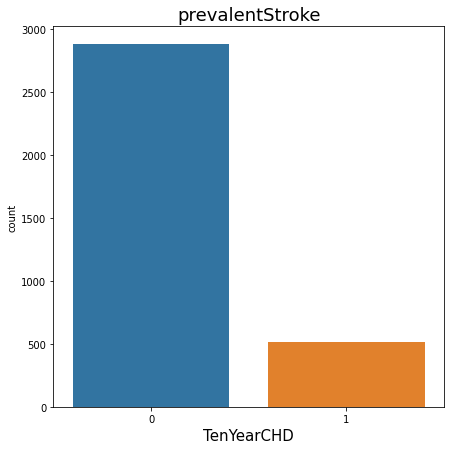

In [ ]:
#plotting countplot to get the no of risky patients

fig, ax = plt.subplots(figsize = ( 7 , 7 ))
sns.countplot(x="TenYearCHD", data=df)
ax.set_xlabel( "TenYearCHD" , size = 15 )
ax.set_title( "prevalentStroke" , size = 18 )
     

**Above we can see the count of risky patient, around 500 patients are in risk and approx. 2800 patient are safe.**

**15% data of one class and 85% of another class, this shows imbalance between the class**

**Number of risky patients with respect to age**

Text(0.5, 1.0, 'prevalentStroke')

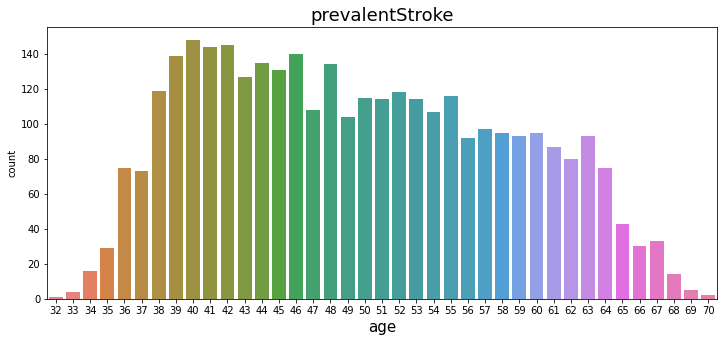

In [ ]:
# Number of risky patients with respect to age

fig, ax = plt.subplots(figsize = ( 12 , 5 ))
sns.countplot(x="age", data=df ,palette='husl')
ax.set_xlabel( "age" , size = 15 )
ax.set_title( "prevalentStroke" , size = 18 )

**Here we can see there is more risk of cardiovascular disease in patients of age between 51 to 63.**

### **Checking continous, discrete and numerical features**

In [ ]:
# Lets check the discrete and continuous features

categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


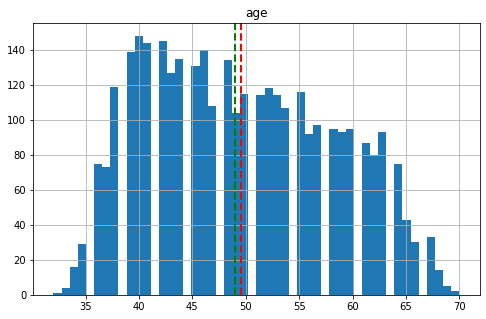

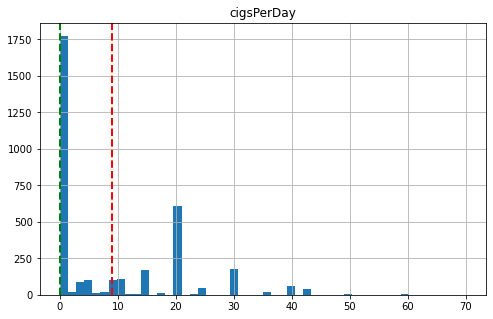

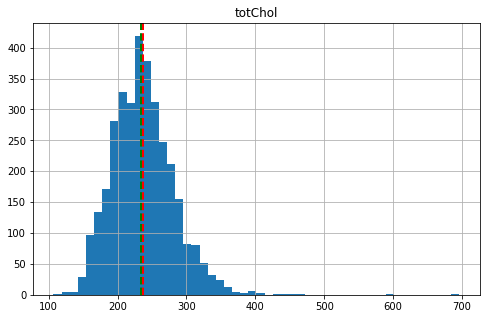

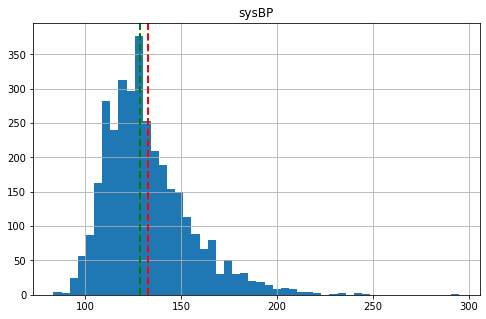

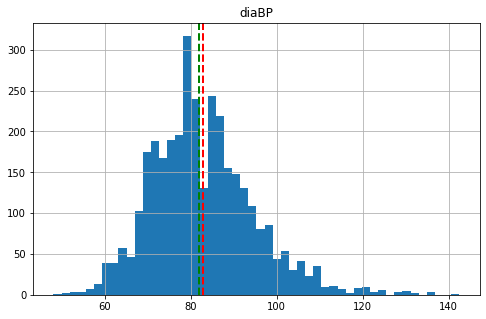

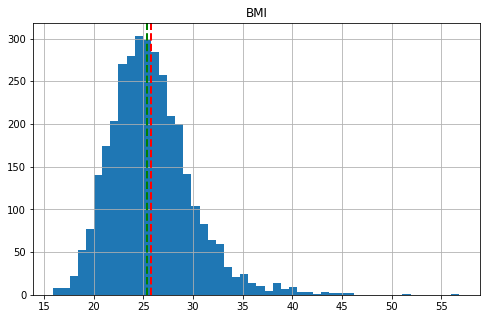

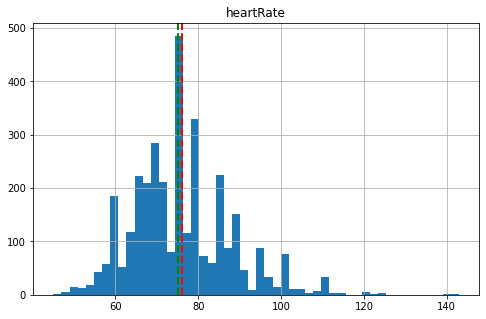

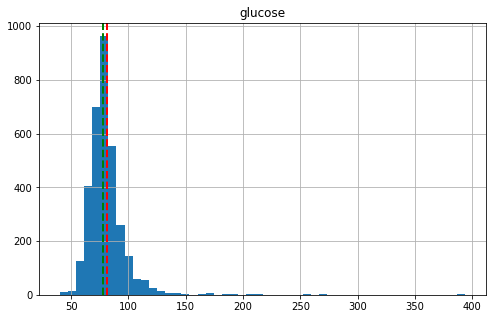

In [ ]:
# plot a bar plot for each numerical feature

for col in numeric_features:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)     
    ax.set_title(col)
plt.show()

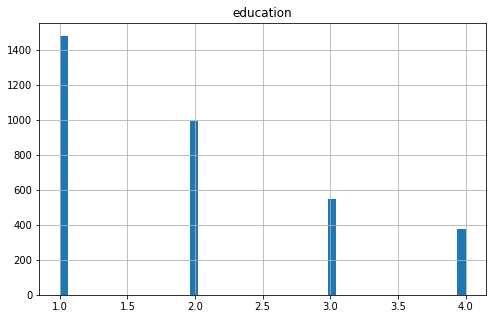

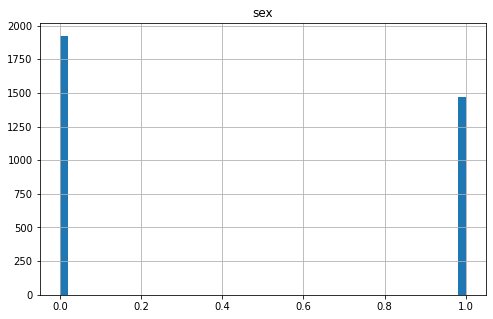

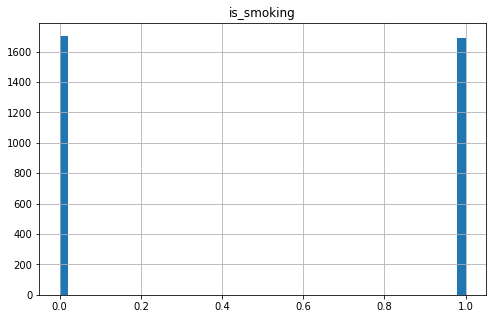

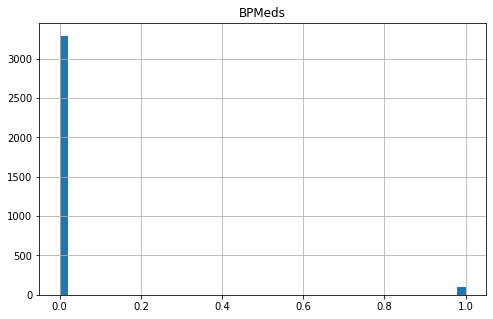

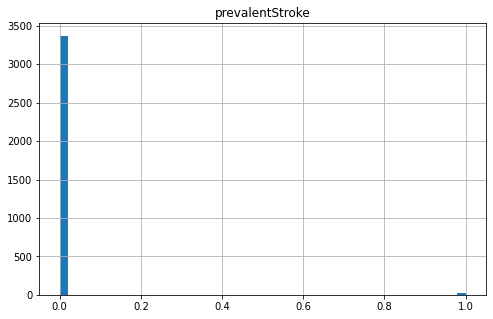

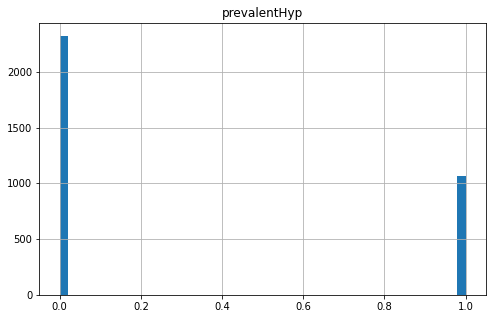

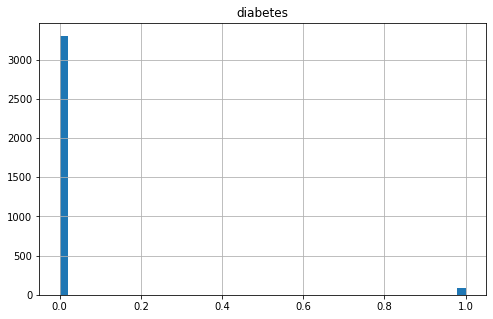

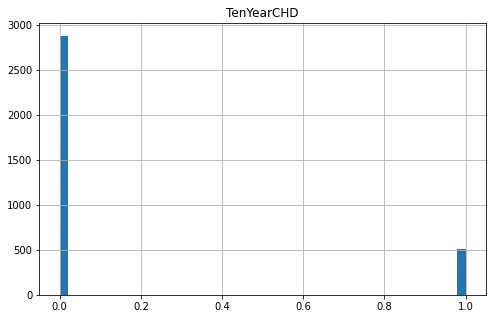

In [ ]:
# plot a bar plot for each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)    
    ax.set_title(col)
plt.show()

- **People in our dataset are divided into four levels in education - 1, 2 ,3 and 4**
- **Females are more compared to males in our dataset.**
- **Number of smokers and non-smokers are Approx equal.**
- **Only few people on BP medication are there in our dataset.**
- **A few people had a stroke in the past.**
- **A few people had diabates.**


## **Subplots for all the features to represent their mean, median and distributions**


---



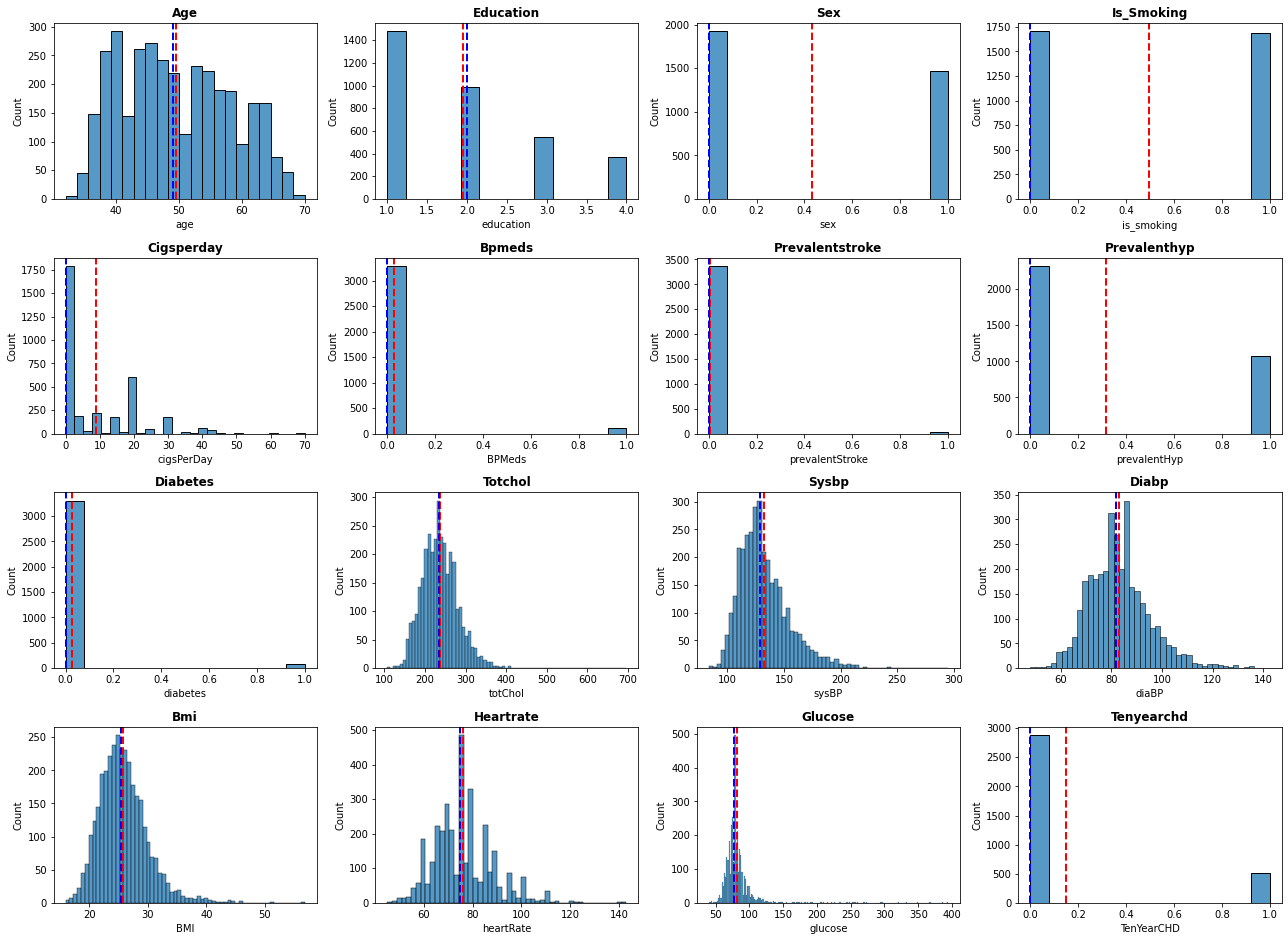

In [ ]:
# subplots for all the features to represent their mean, median and distributions

plt.figure(figsize=(18,16))

for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

## **Bivariate Analysis**


---



### **Plotting education levels vs people having diseases**

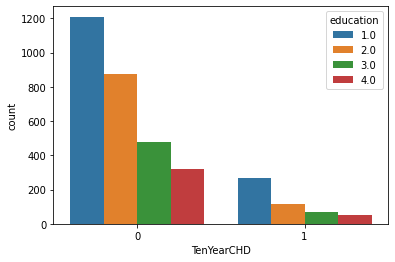

In [ ]:
# count plot of education levels people having diseases

sns.countplot(x ='TenYearCHD', hue ='education', data = df)

**Education also plays an important role here. Those who represent education=4 are less in chd**

### **Plotting for categorical columns**

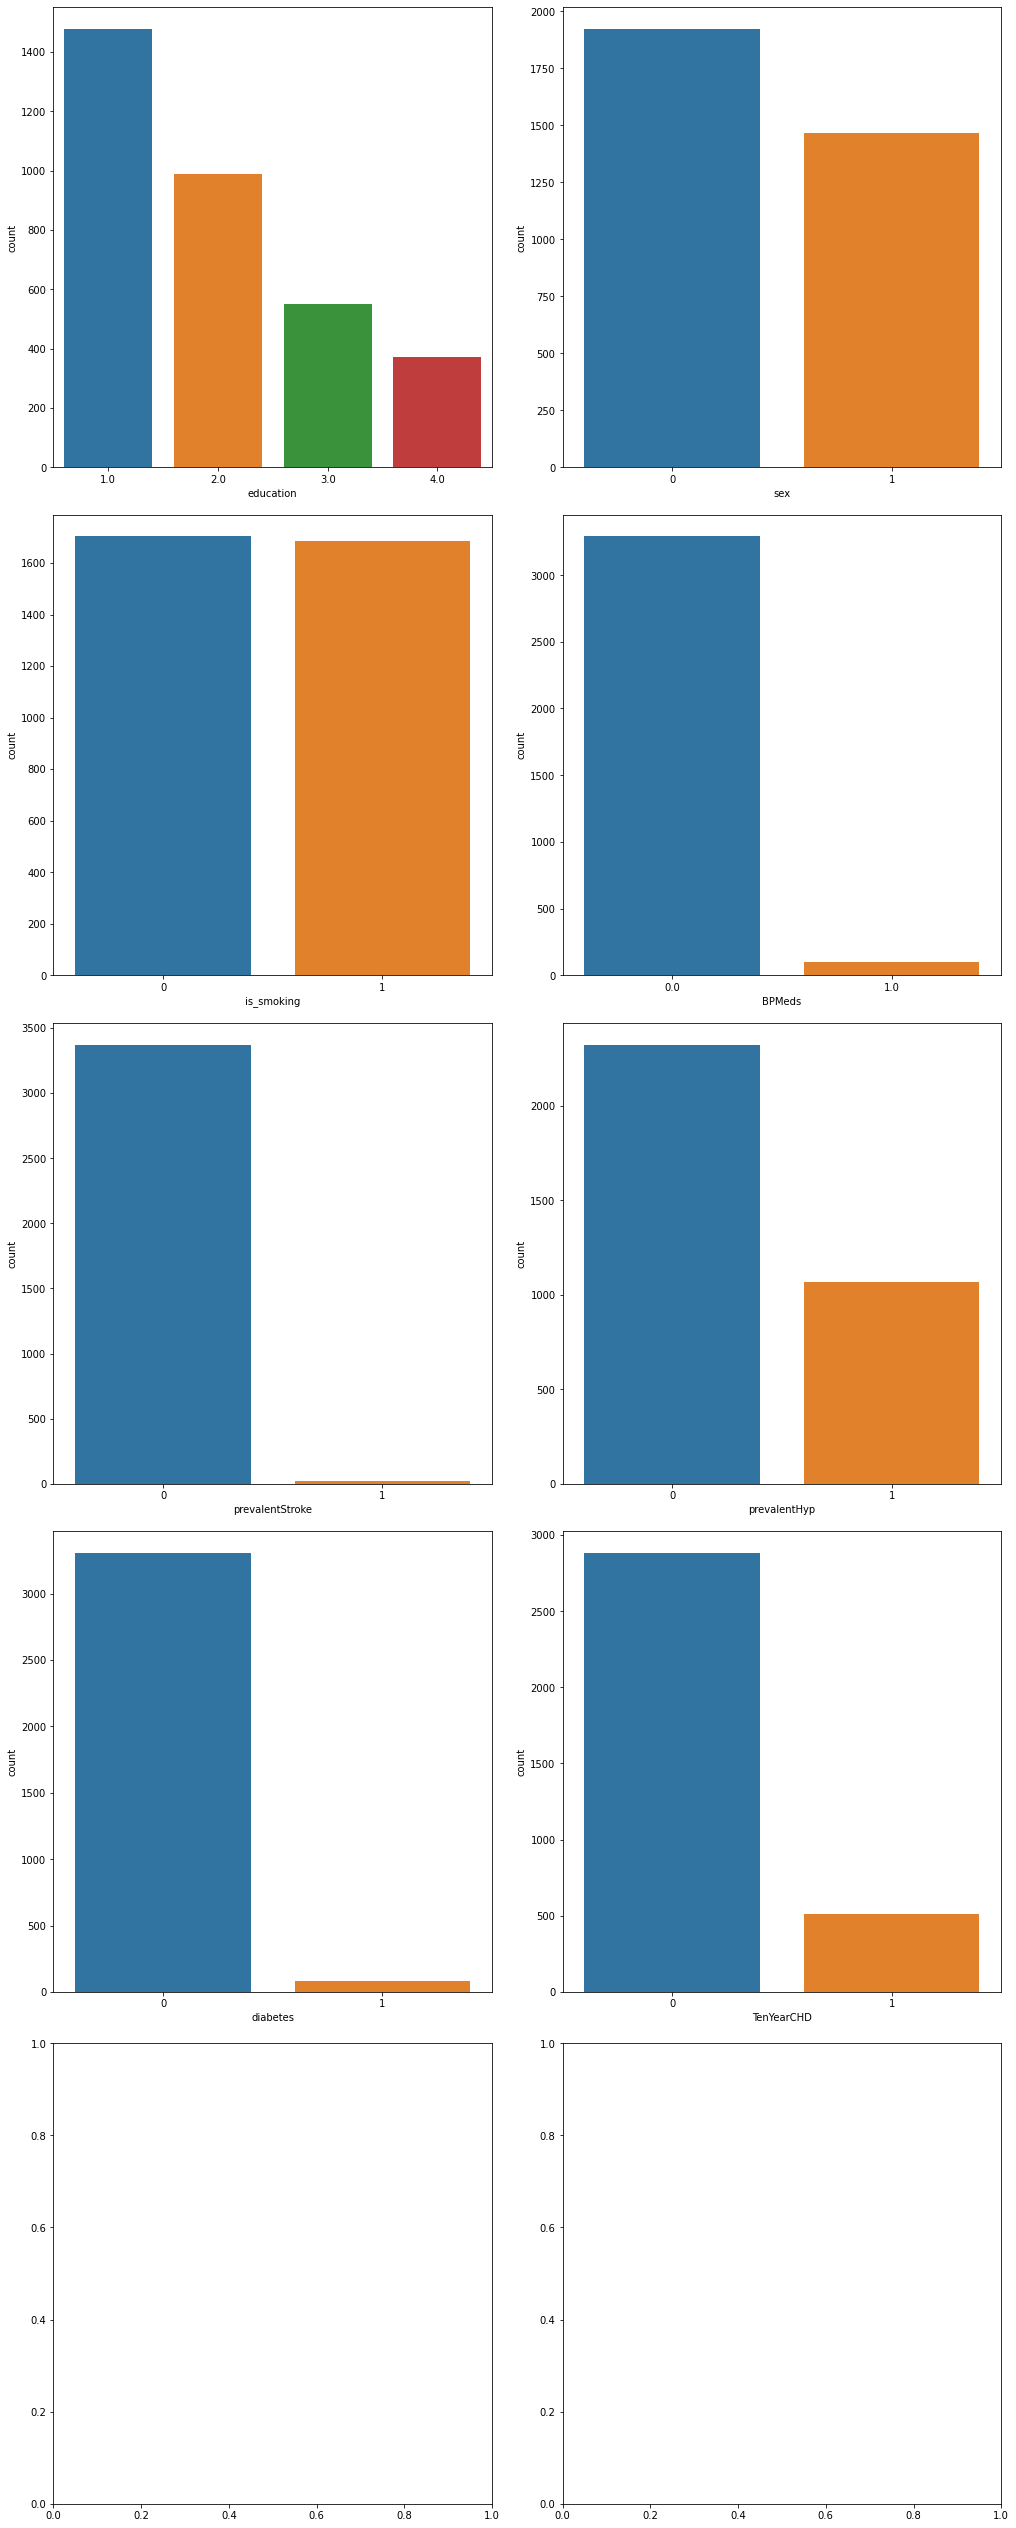

In [ ]:
#plotting for categorical columns

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

**Number of people who were not on BPmeds, who did not had a stroke in past. Those who dont have diastolic blood pressure are very less.**

### **Plotting age & sex vs risk**

In [ ]:
# plotting age & sex vs risk

at_risk = "At risk"
no_risk= "No risk"

Text(0.5, 1.0, 'Male')

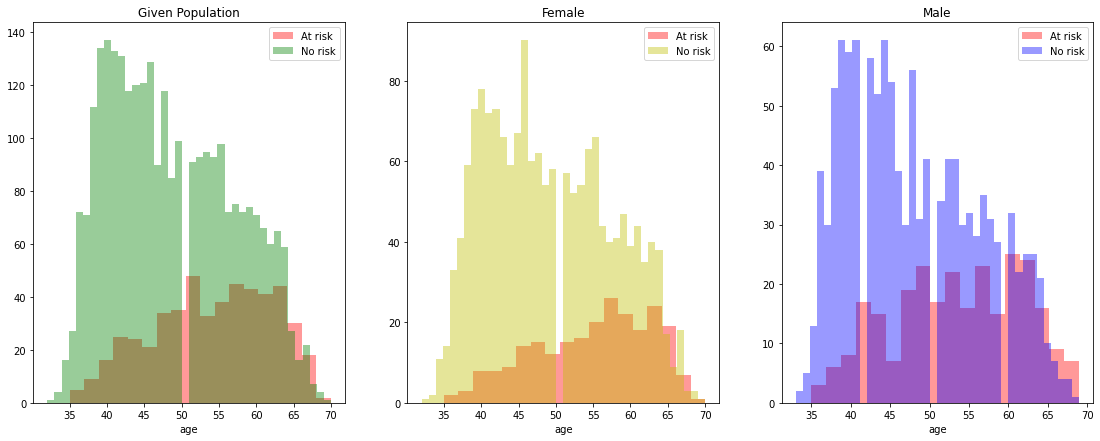

In [ ]:
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(19,7))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='y',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='b',kde=False)
ax.legend()
ax.set_title("Male")

- **Both sexes, in Age group of 50 and above have high risk of heart disease.**
- **Men above 45 years are usually at risk, where as women above 55 years are usually at risk.**
- **Men are more likely to have heart disease compared to women.**

### **Dividing the age into three section and plotting**

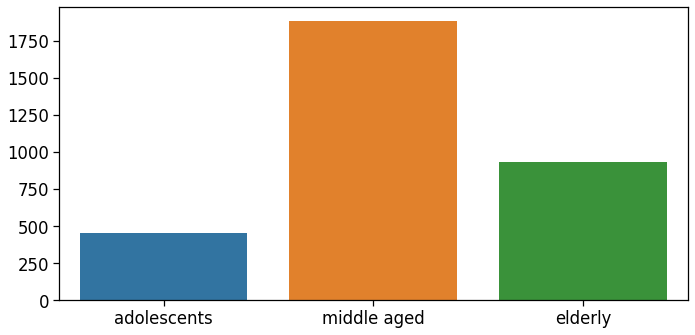

In [ ]:
#dividing the age into three section

Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['adolescents','middle aged','elderly'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**Count of Middle aged people are highest followed by elderly.**

### **Plotting heartrate vs cig per day**

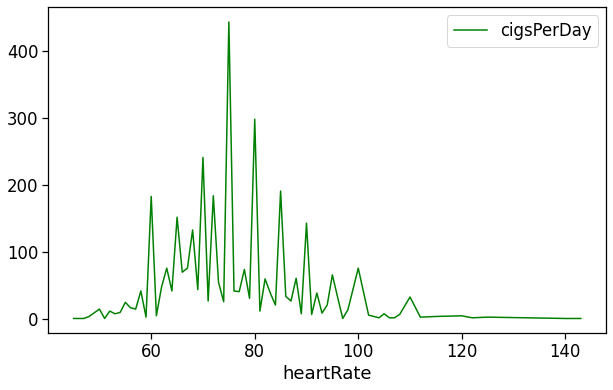

In [ ]:
#creating dataframe of heartrate and cig per day

heartRate_VS_cig_per_day=df.groupby('heartRate')['cigsPerDay'].count()
heartRate_VS_cig_per_day_df=pd.DataFrame(heartRate_VS_cig_per_day).reset_index()
     

heartRate_VS_cig_per_day_df.plot(x='heartRate',y='cigsPerDay', figsize=(10,6),color='g')

**Here we can see most people smoke cigarettes between 1 to 10 approx. and their heart rate lies between 60 to 100.**

### **Age wise smoking ratio**

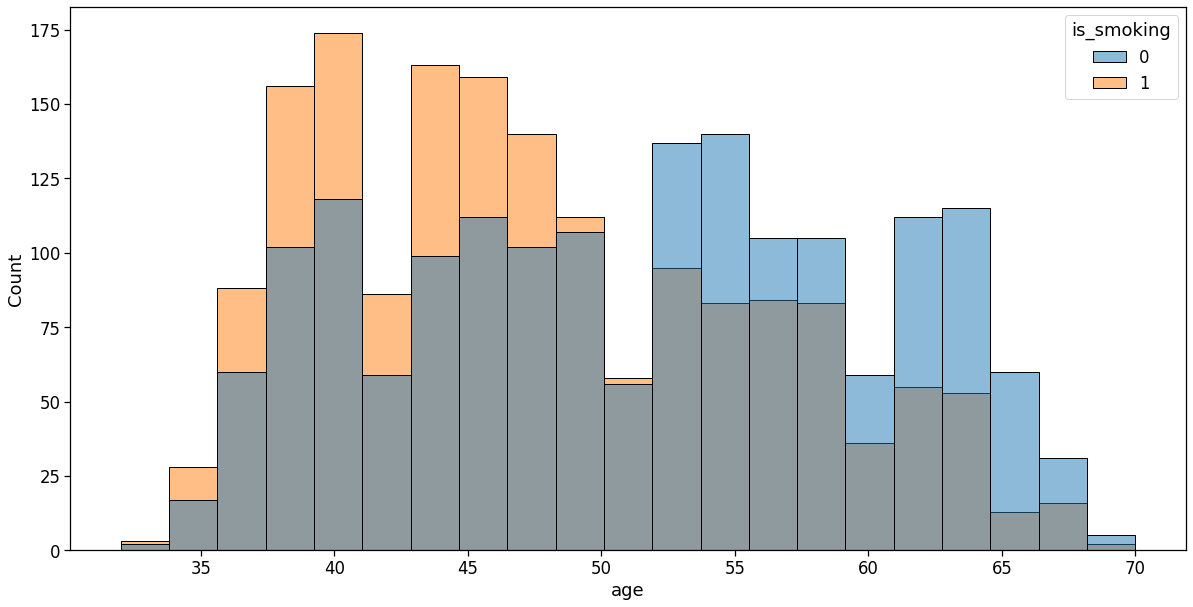

In [ ]:
# age wise smoking ratio

plt.figure(figsize=(20,10), facecolor='w')
sns.histplot(x="age",data=df,hue="is_smoking")

**Number of smokers between the age group of 35 to 50 is highest i.e. Young and middle aged**

### **Age and smoking vs risk factor**

Text(0.5, 1.0, 'NonSmokers')

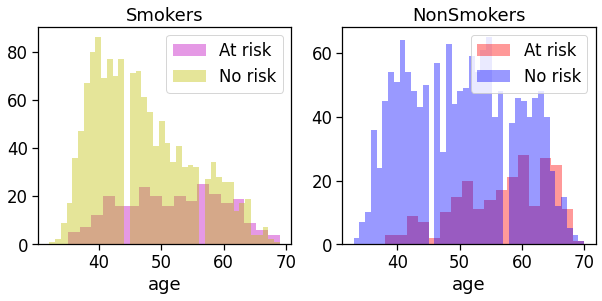

In [ ]:
# age and smoking vs risks

smoking= df[df['is_smoking']==1]
non_smoking= df[df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='m',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='y',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='b',kde=False)
ax.legend()
ax.set_title("NonSmokers")

**Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.**

### **CigsPerDay & Sex vs Risk**

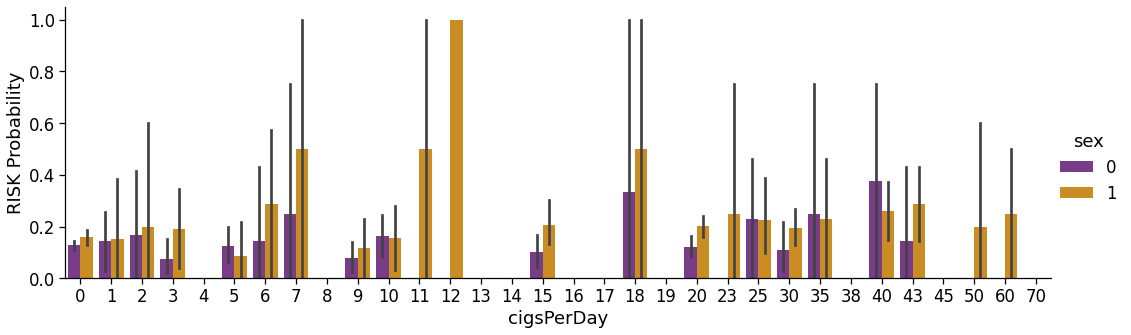

In [ ]:
# CigsPerDay & Sex vs Risk

df['cigsPerDay']=df['cigsPerDay'].astype(int)
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3, palette="CMRmap")
g=g.set_ylabels("RISK Probability")

**Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers**

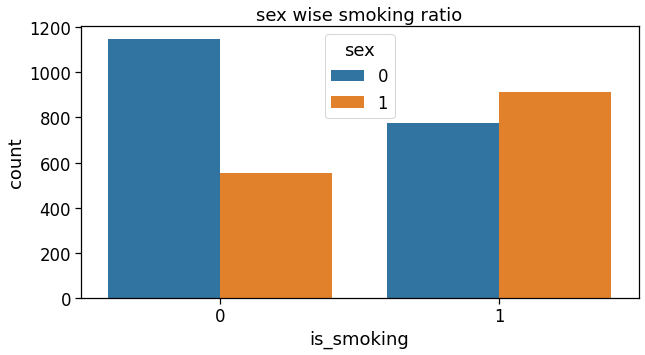

In [ ]:
# males and females smoker
plt.figure(figsize=(10,5))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

**Number of male smokers is higher than female smokers**

### **Which gender is more prone to CHD**

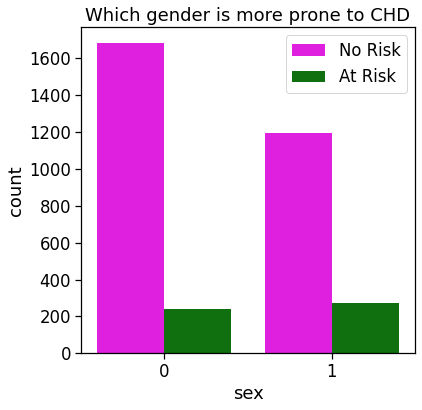

In [ ]:
# plotting genderwise
my_palette = {0 : 'magenta' , 1 : 'green'}
plt.figure(figsize = (6,6))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

**The number of males and females which are at risk of CHD is equal.**

**The number of females who are not at risk is higher than that of male**

### **Systolic BP with respect to age**

Text(0.5, 1.0, 'Age vs sysBP')

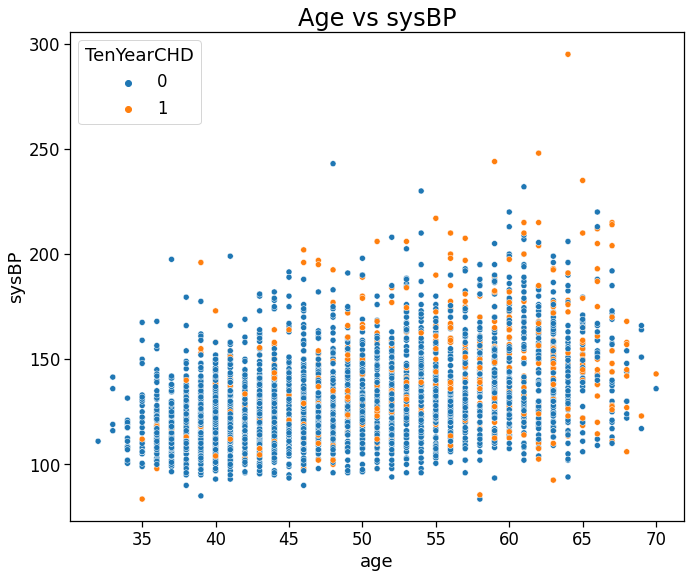

In [ ]:
# Systolic BP with respect to age

fig, ax = plt.subplots(figsize = ( 11 , 9 ))
sns.scatterplot(data=df, x="age", y="sysBP", hue="TenYearCHD")
ax.set_title( "Age vs sysBP" , size = 24 )

**Here we can see age lies between 32 to 70 and most of the people's systolic BP lies between 90 to 200**

### **Diabetes vs heart disease**

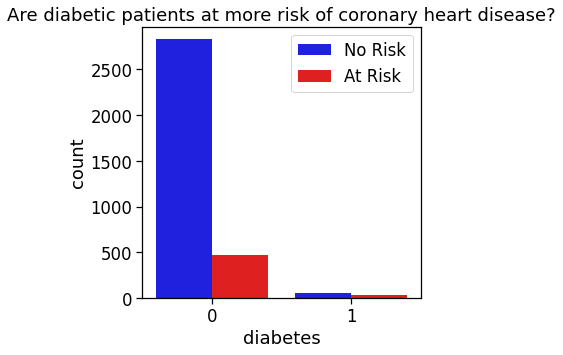

In [ ]:
# diabetes vs heart disease 

my_palette = {0 : 'blue' , 1 : 'red'}
plt.figure(figsize = (5,5))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Diabetic patients are at more risk of CHD.**

### **Plotting hypersensitivity vs risk**

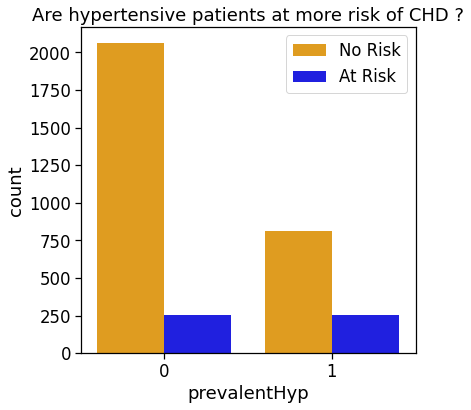

In [ ]:
# hypersensitivity vs risk

plt.figure(figsize = (6,6))
my_palette = {0 : 'orange' , 1 : 'blue'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Out of all the people who are not Hypertensive, the number of people getting CHD is very less.**
**People who are hypertensive has more chances of getting CHD.**

### **Patients with blood pressure on medication vs risk factor**

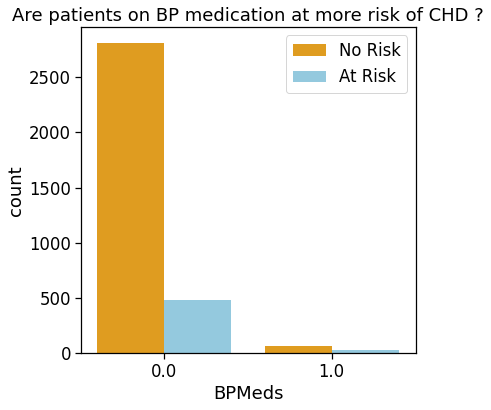

In [ ]:
# patients with blood pressure on medication vs risk factor

my_palette = {0 : 'orange' , 1 : 'skyblue'}
plt.figure(figsize = (6,6))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Patients on BP medication are more prone to CHD where as those who are not on BP medication has severely less chances of getting CHD.**

### **Had a stroke earlier vs risk factor**

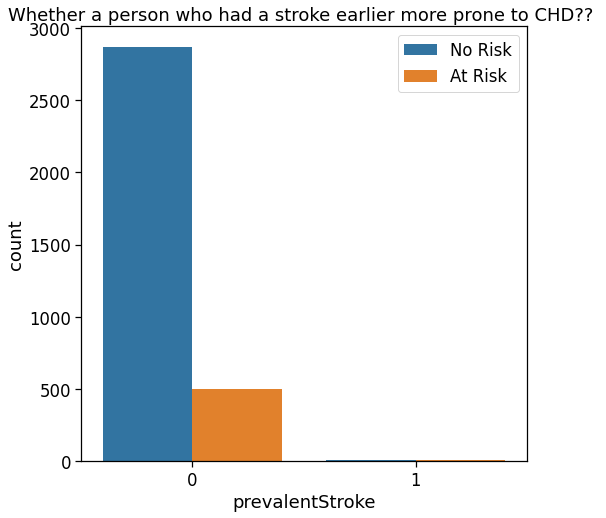

In [ ]:
# had a stroke earlier vs risk factor

plt.figure(figsize = (8,8))
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

**The person who previously had a heart stroke are more at risk to CHD than those who did not**

### **Checking Linearity**


---



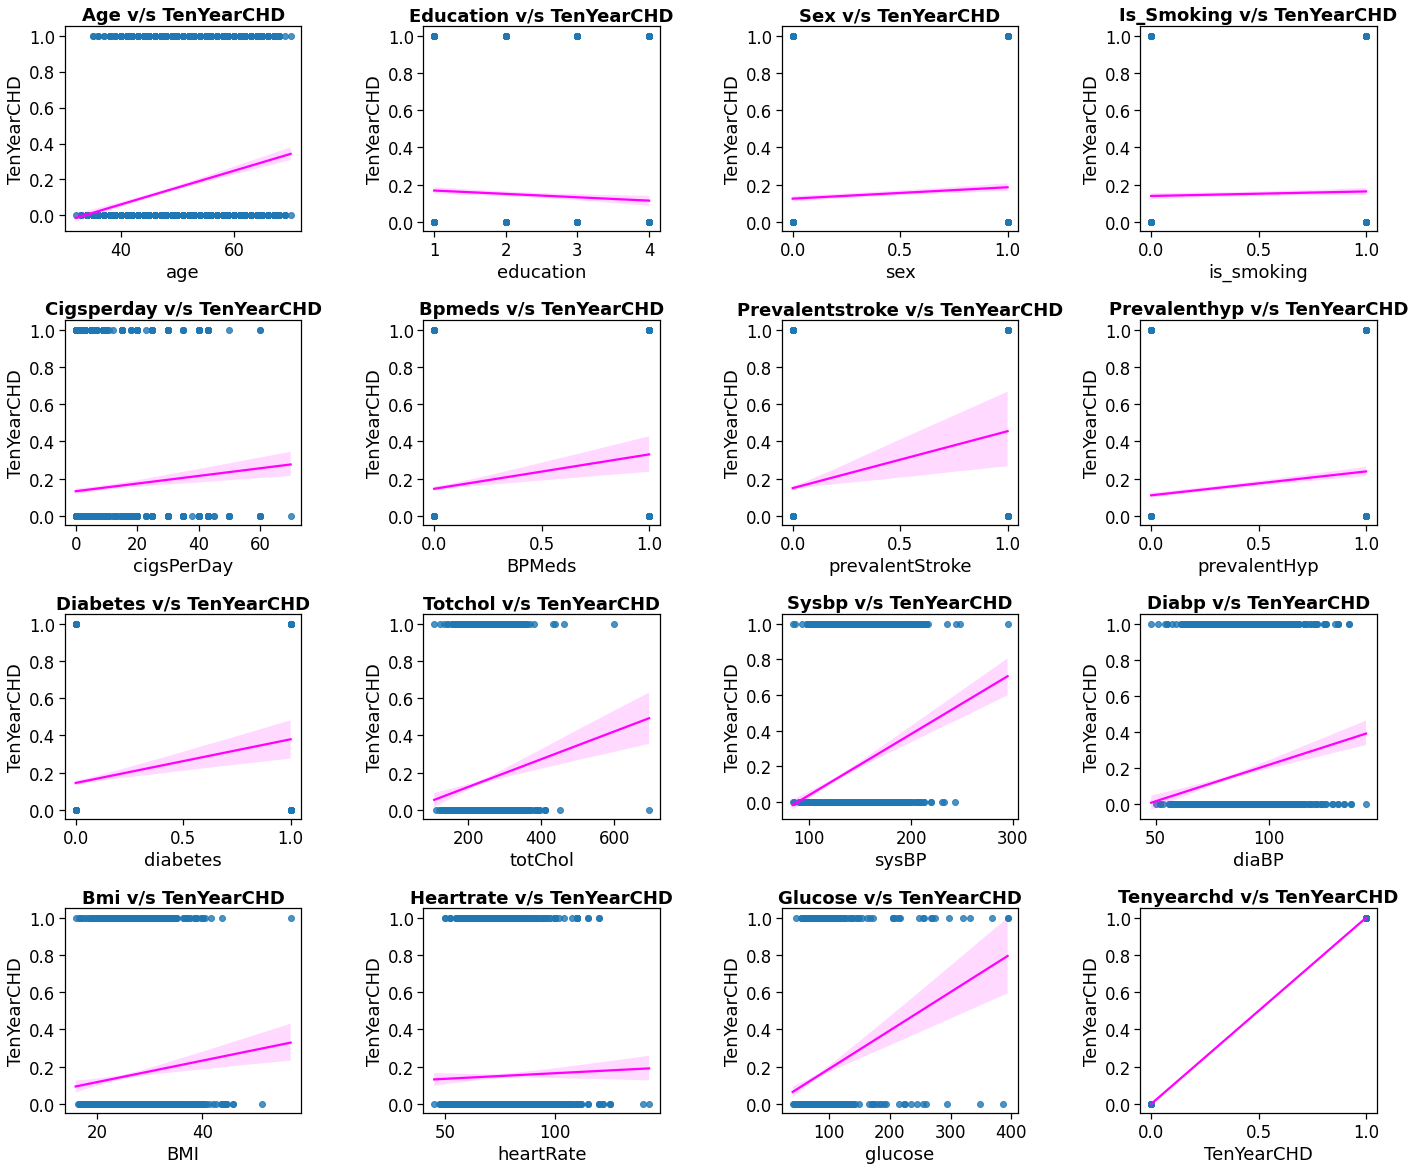

In [ ]:
# Checking Linearity

independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]

plt.figure(figsize=(20,20))
for n,column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "magenta"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

## **Multivariate Analysis**


---



### **Age vs with numerical values (cigsperday, total cholestrol, sysbp, diabp,glucose, heartrate and BMI)**




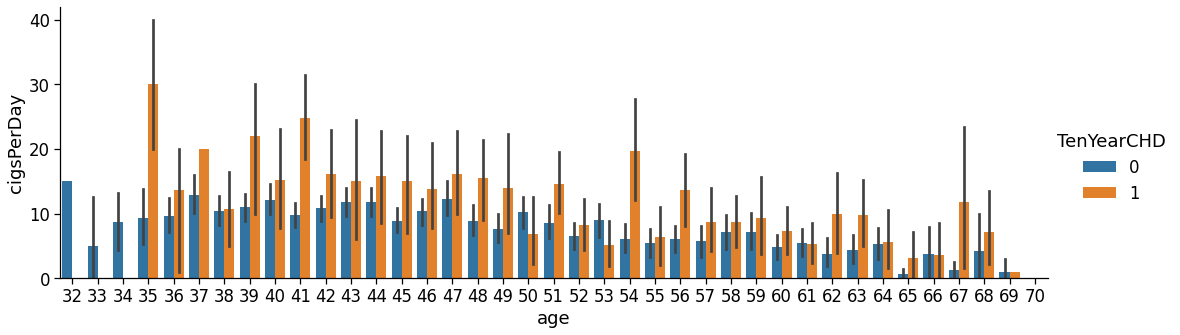

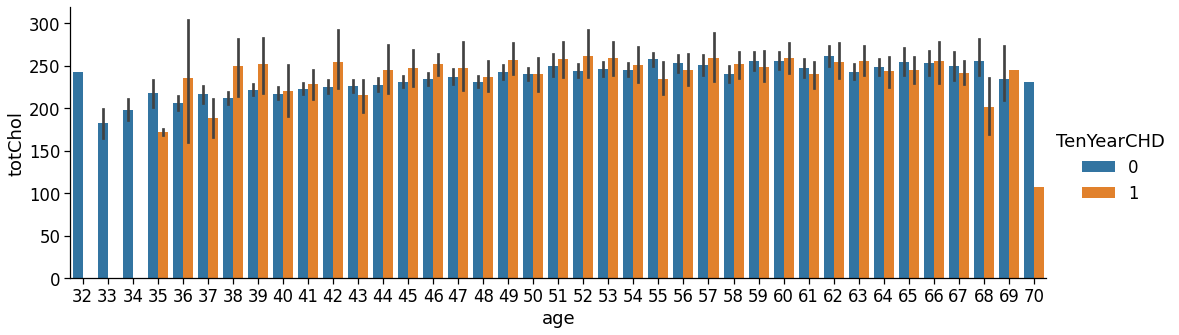

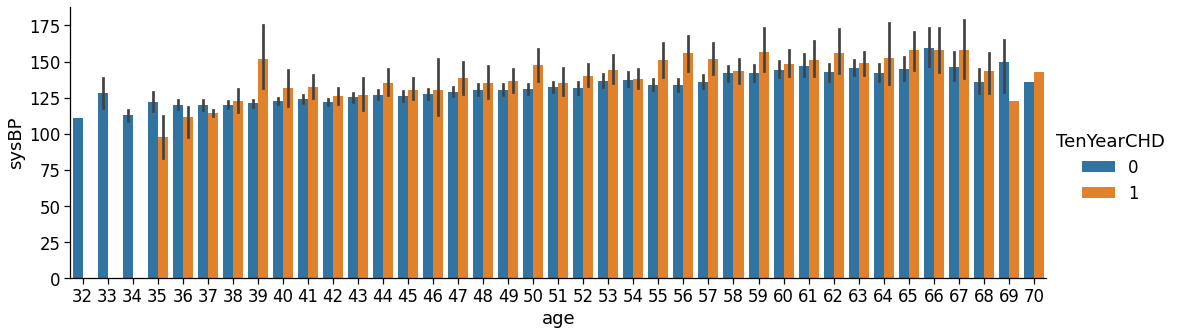

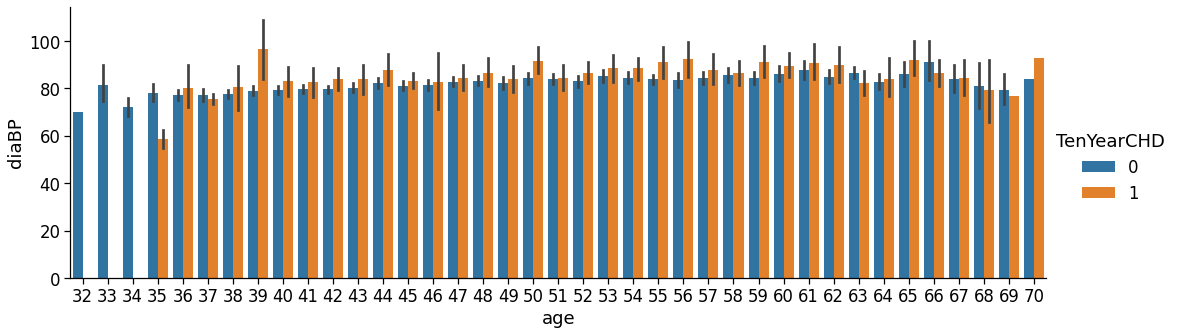

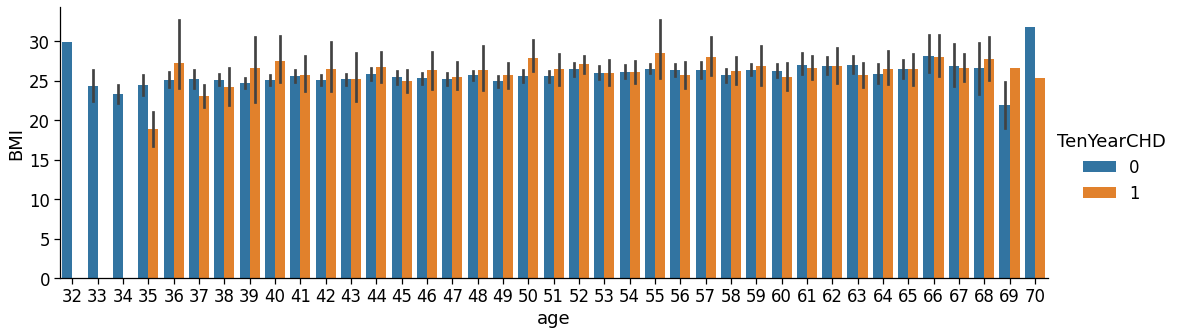

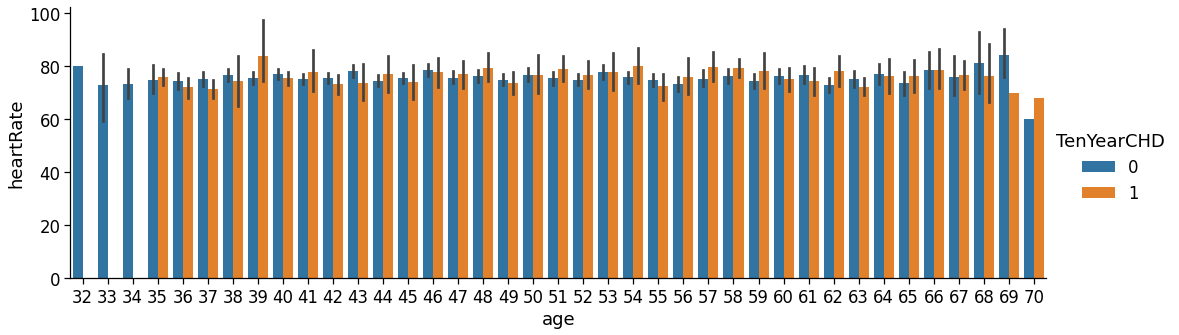

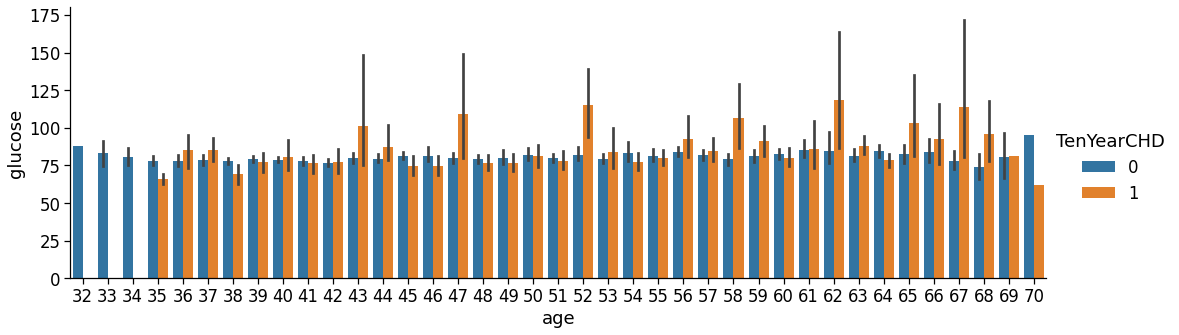

In [ ]:
# age vs with other numerical values

for i in numerical_columns:
  if i!='age':
    sns.catplot(x="age", y=i, hue="TenYearCHD", kind="bar", data=df,height=5, aspect=3)

- **The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.**

- **The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.**

- **If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR**

### **Plotting Education vs numerical values (cigsperday, total cholestrol, sysbp, diabp,glucose, heartrate and BMI)**

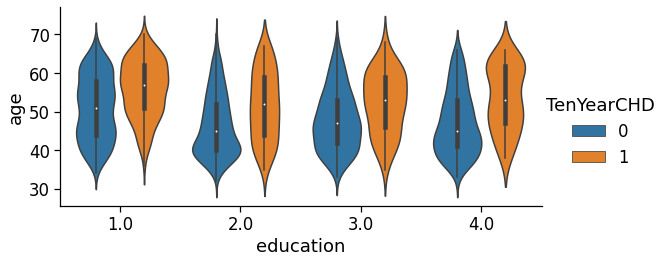

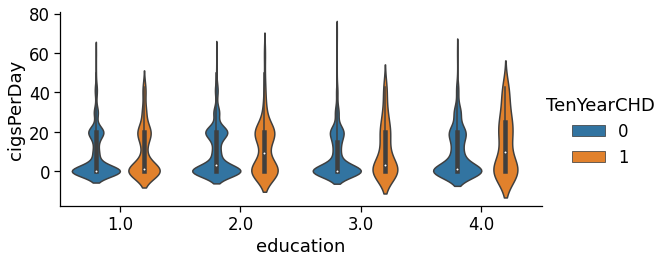

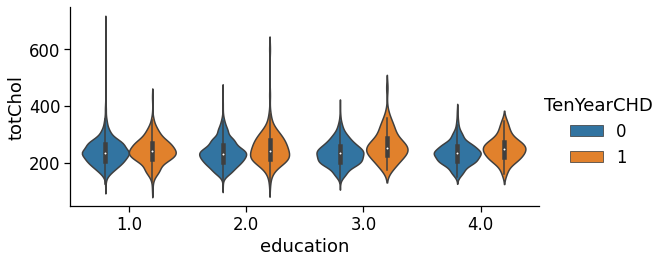

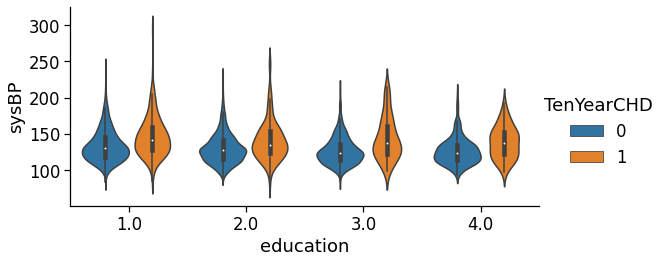

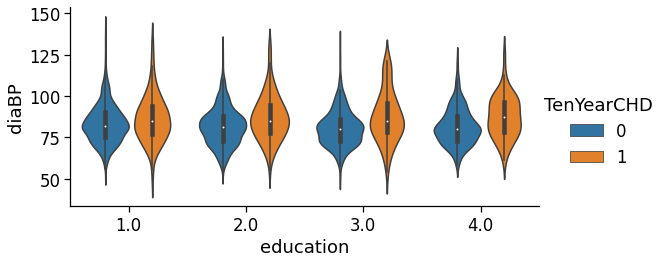

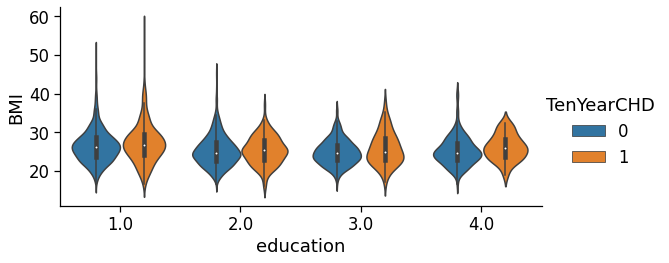

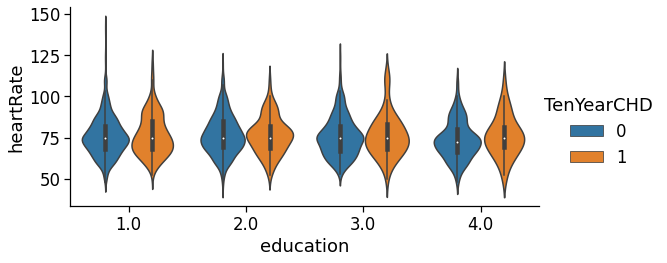

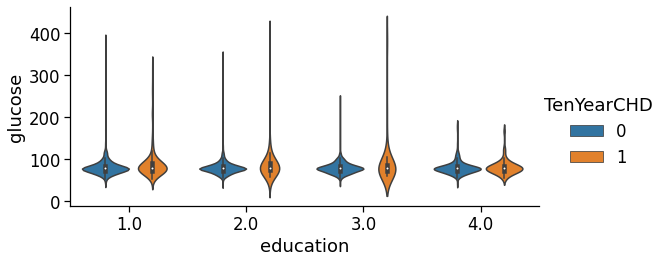

In [ ]:
# Education and CVR vs other numerical columns

for i in numerical_columns:
  sns.catplot(x="education", y=i, hue="TenYearCHD", kind="violin", data=df,height=4, aspect=2)

- **The people who had the basic level education are at more risk of CVR when we compare the levels of education.**

- **Cholestrol level is high for fewer people in education level 2. But people who had basic education were at more risk of CVR.**

- **People with only the basic education are having more BP(considering sysBP,diaBP together), heartrate and BMI as well. So they are directly at more risk of CVR.**

- **People with the highest education (Education 4) are having controlled balanced glucose level. But other fewer people with other education levels are having very high cholestrol. We cna see a peak in glucose level in education leval 3 group people**

### **Plotting sex vs numerical values (cigsperday, total cholestrol, sysbp, diabp,glucose, heartrate and BMI)**

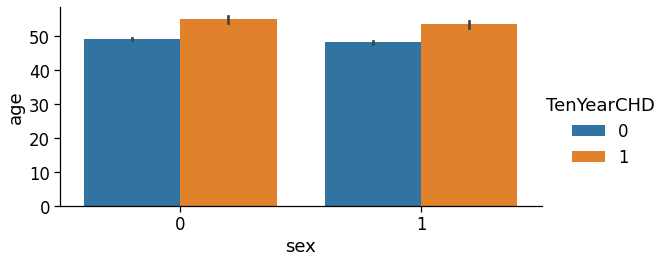

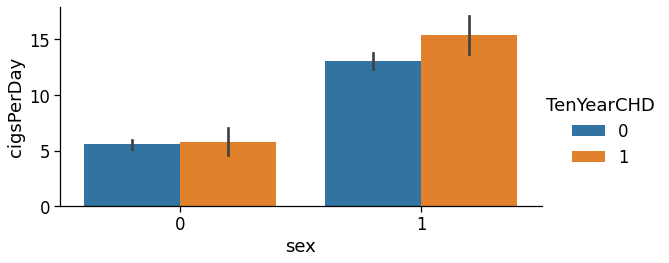

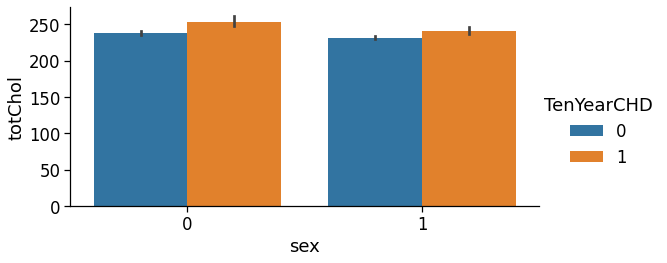

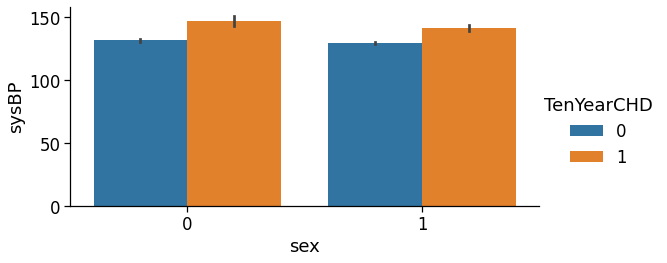

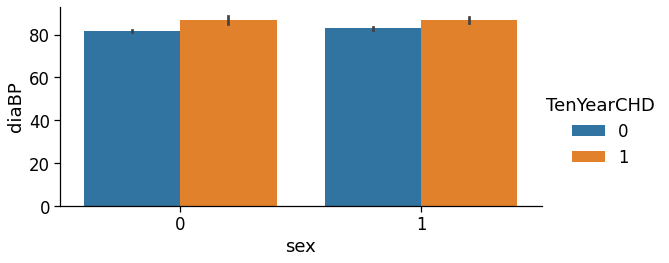

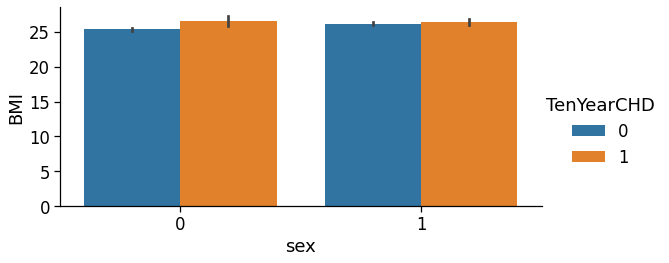

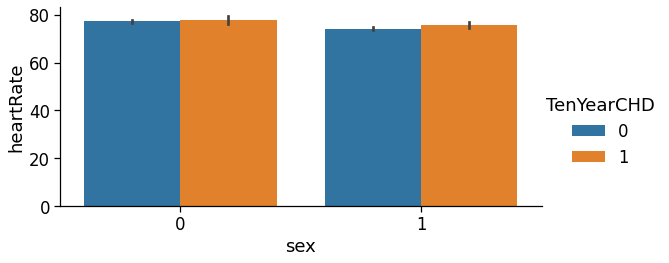

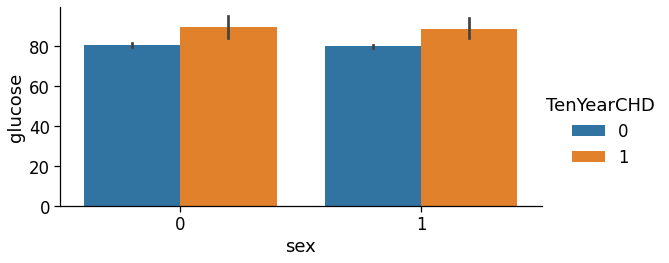

In [ ]:
# Sex and CVR vs other numerical columns

for i in numerical_columns:
  sns.catplot(x="sex", y=i, hue="TenYearCHD", kind="bar", data=df,height=4, aspect=2)

- **Females are having high BP, high heart rate, high BMI and even high values of glucose. But the females who are between the age group of 50-70 are at more risk of CVR.**

- **Males between the age group 40-70 are at more risk of CVR.**

- **Whoever had the highest glucose level amongst men all comes under the risk of CVR.**

- **We can see that some of the highest cholestrol values are obtained by men (alone). This might be the reason that they are at high risk of CVR.**

- **But many men maintained normal range of BP, heartrate and BMI.**

### **Min-Max scaling and Distribution plot of all numerical variables**


---



Text(0.5, 0, 'Numerical variables')

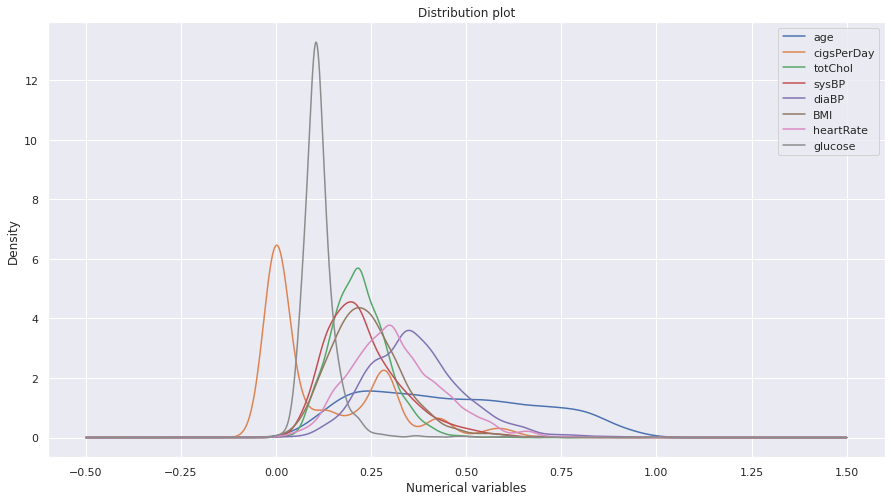

In [ ]:
# Distribution plot of all numerical variables
from sklearn.preprocessing import MinMaxScaler
# Min max scaler
column_names = numerical_columns

# taking columns to do the minmaxscaling
cardio_2 = pd.DataFrame()
# using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numerical_columns])
cardio_2 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]))
cardio_2.columns = column_names

sns.set(rc = {'figure.figsize':(15,8)})
cardio_2.plot.kde()
plt.title("Distribution plot")
plt.xlabel("Numerical variables")

**We can observe that there are many people with high level of glucose followed by cholestrol. It might be that the lifestyle of people are contributing more to these values. So we observe some peaks in these vlaues**

## **Correlation Heatmap**


---



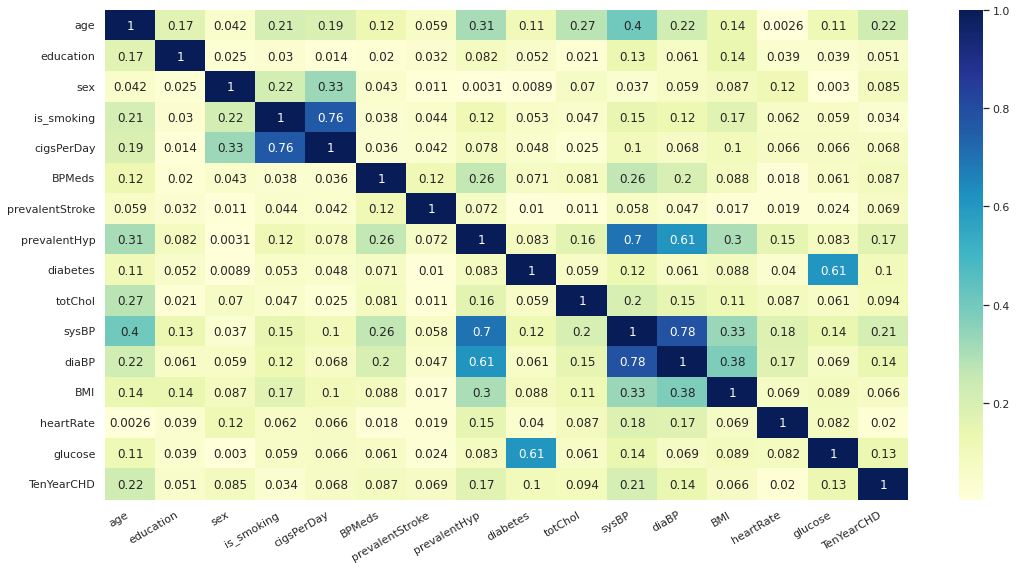

In [ ]:
# Correlation Heatmap visualization 

plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='YlGnBu')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

- **sysBP and diaBP show the strongest positive correlation**
- **is_smoking and cigsPerDay are positively co-related**
- **diabetes and glucose are positively co-related**
- **Correlation of diabetes with glucose and prevalentHyp with diaBP is equal**

### **Plotting Univariate, bivariate and multivariate analysis pair plot for Overview**


---



<Figure size 360x360 with 0 Axes>

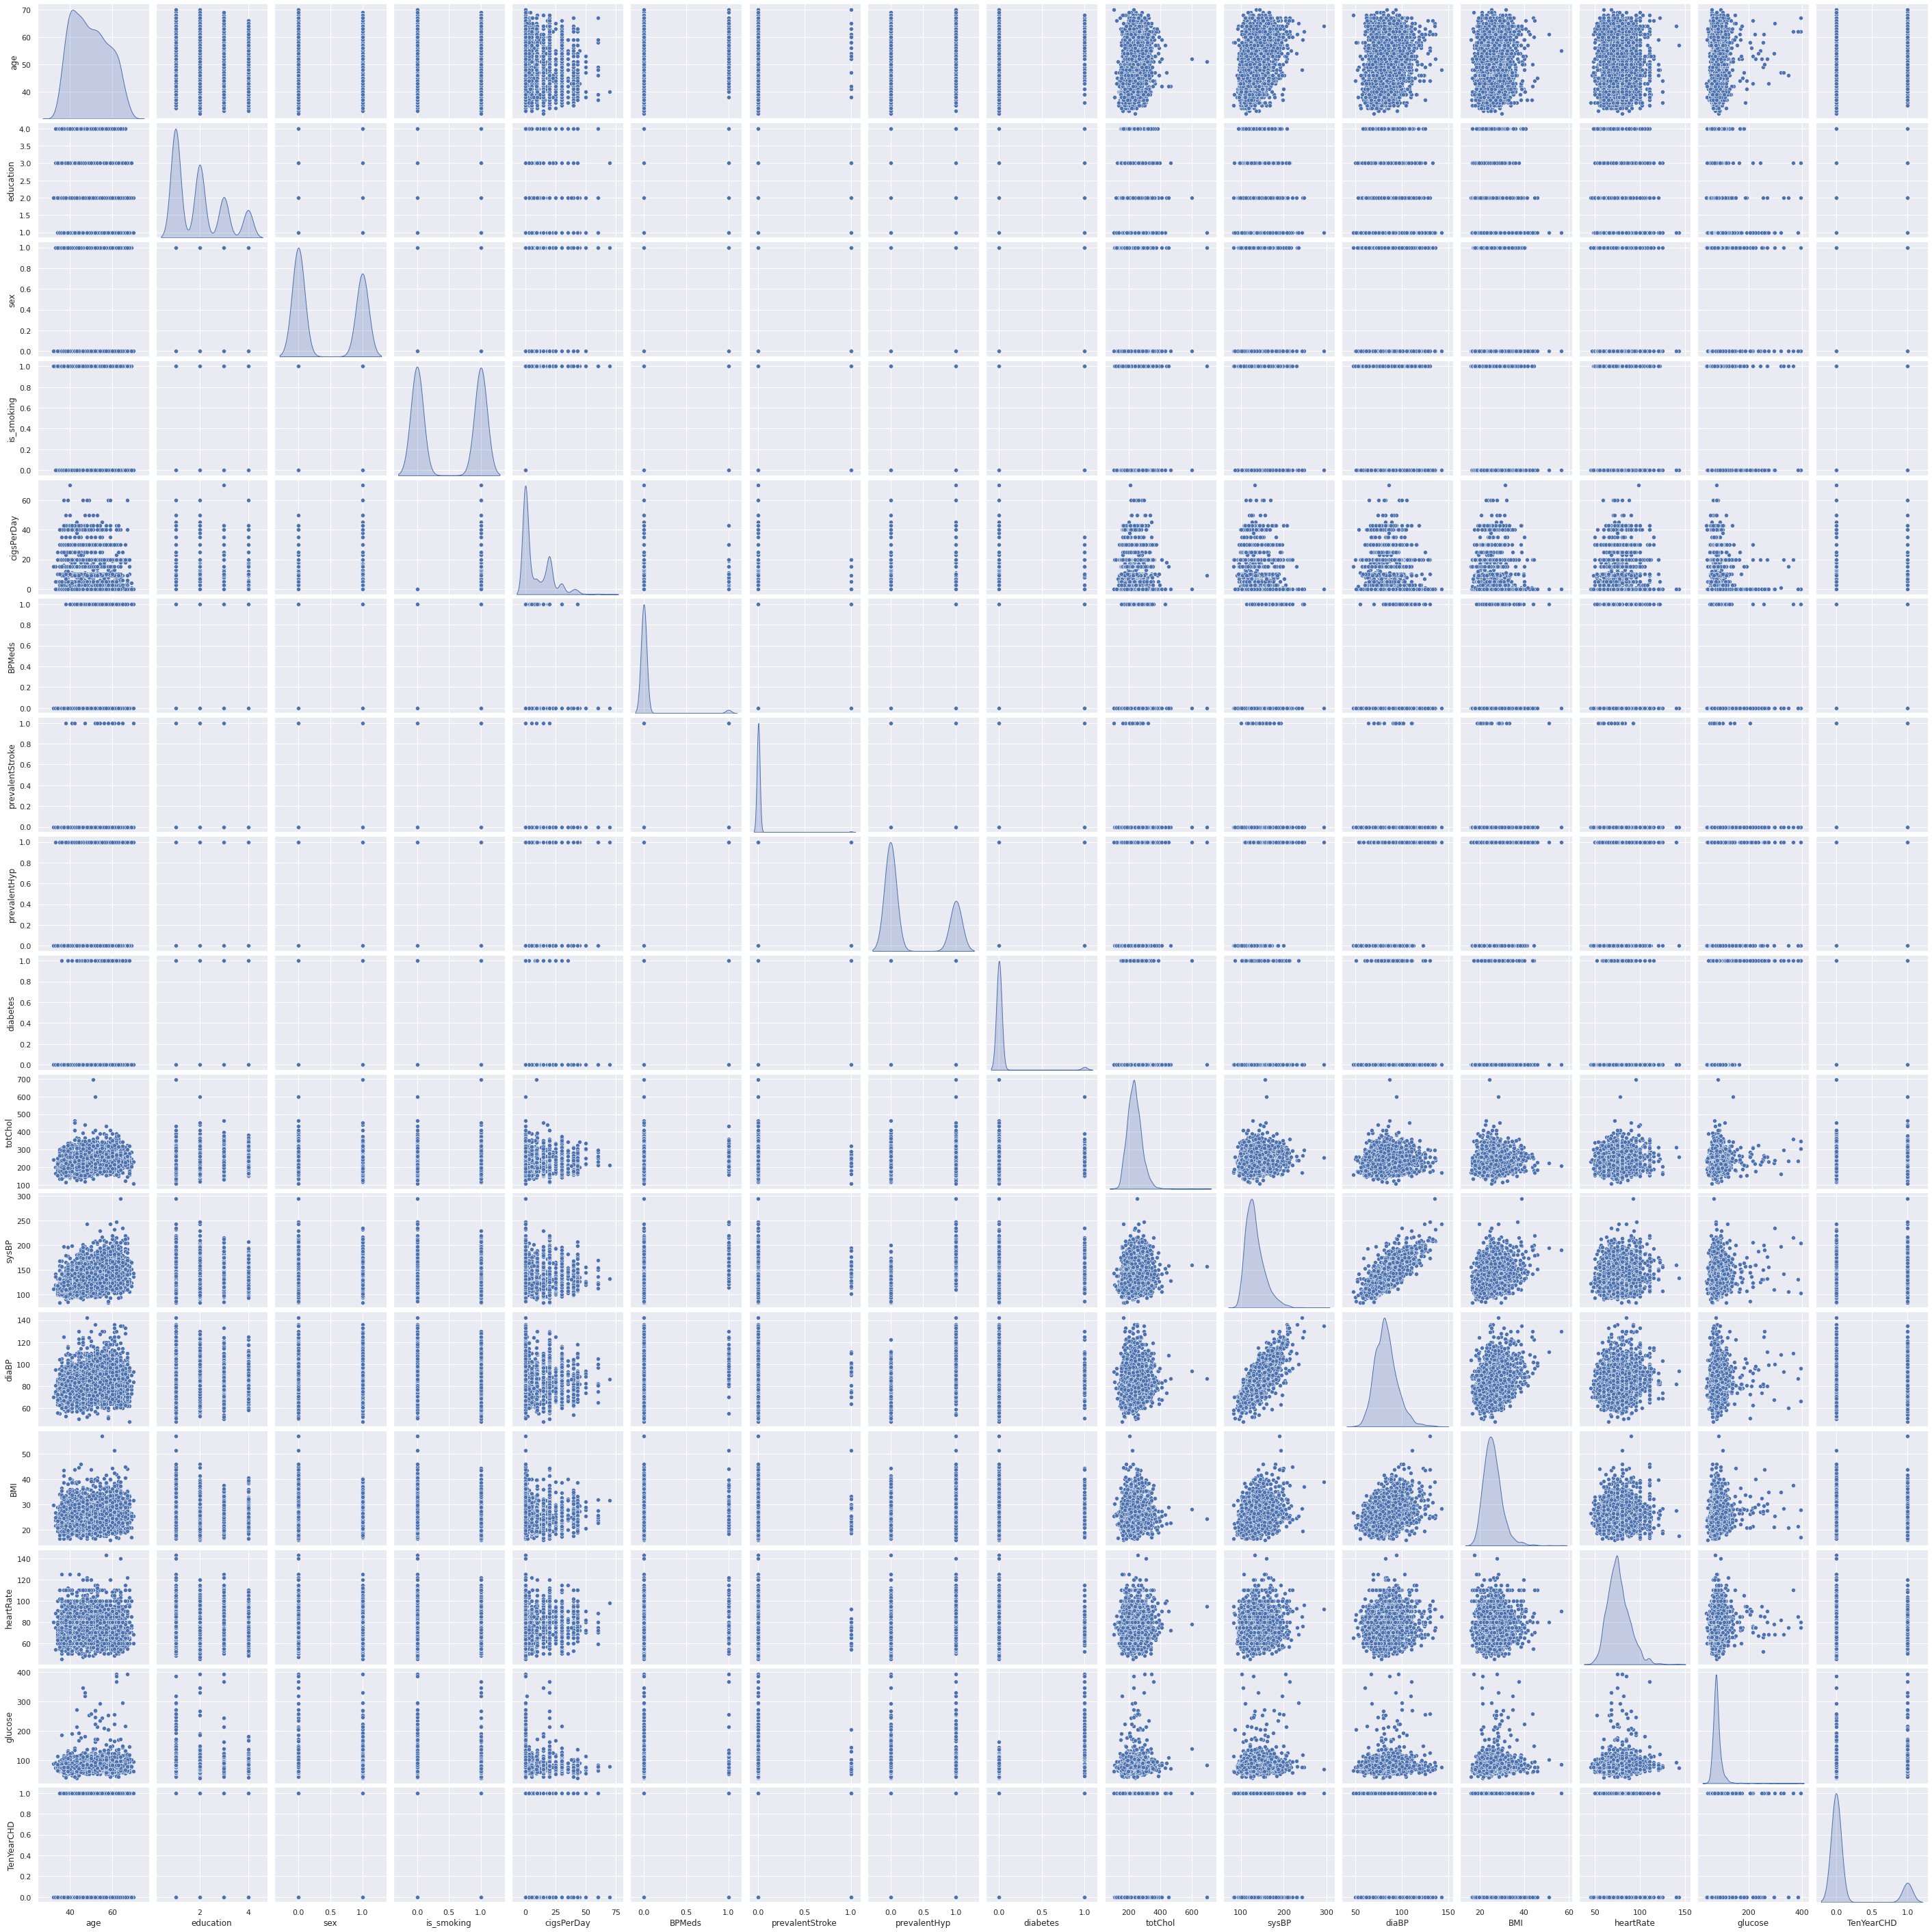

In [ ]:
# Pair plot Univariate, bivariate and multivariate analysis in a single plot just for overview

plt.figure(figsize=(5,5))
sns.pairplot(data=df, kind='scatter', diag_kind='kde')
plt.show()

### **Plotting Stacked Bar-Chart**


---



In [ ]:
from operator import add
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
  # Function to plot stacked bar chart
    default_colors = ['#005301', '#FA0001', '#267B41']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.65
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 15))

    for item in ([ax.title]):
        item.set_fontsize(17)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='10')

### **Stackplot- sex, smoking, diabetes,outcome, bp meds and hypertension vs CHD outcome**


---



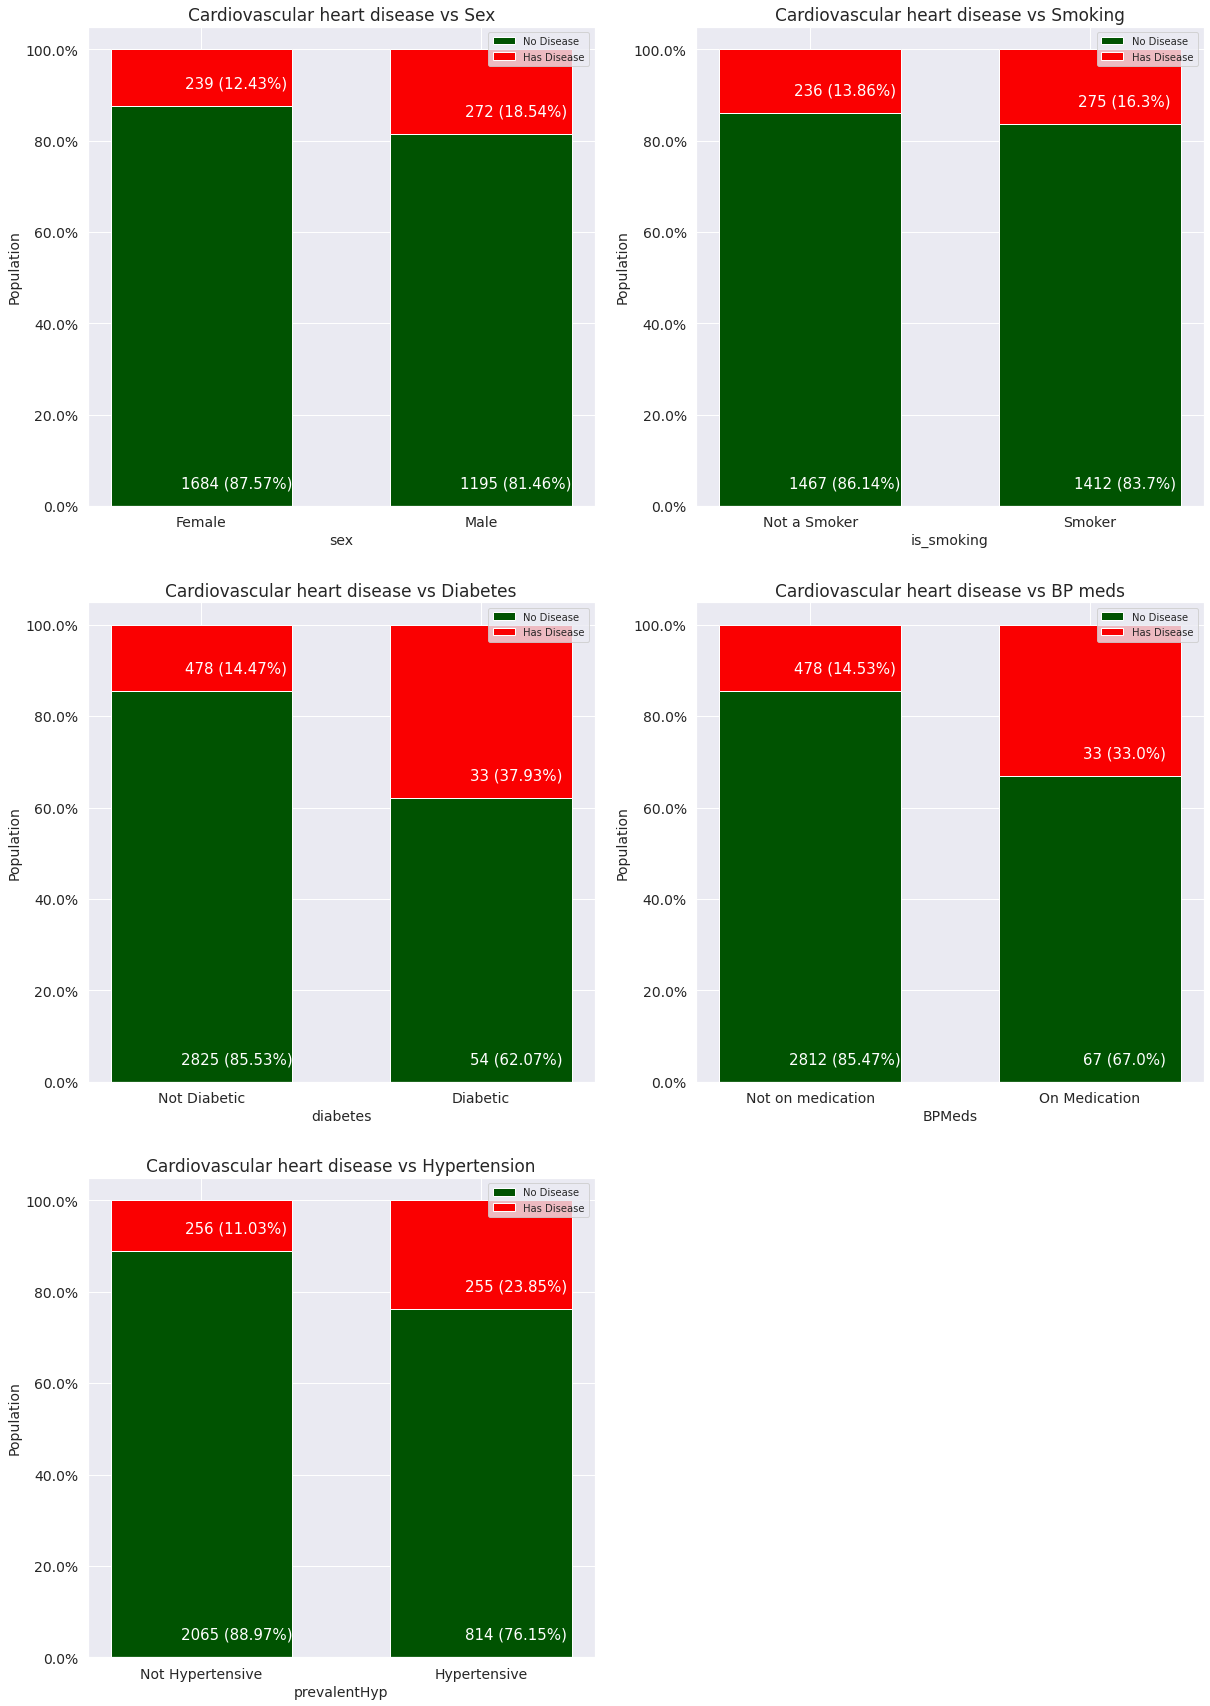

In [ ]:
# Visualzing each category with respect to target variable
fig = plt.gcf()
fig.set_size_inches(20, 30)
grid_rows = 3
grid_cols = 2

#Plot sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','TenYearCHD']].groupby(['sex','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Sex', ylabel = 'Population')

#Plot smoking status vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['is_smoking','TenYearCHD']].groupby(['is_smoking','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Smoking', ylabel = 'Population')

#Plot diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Diabetes', ylabel = 'Population')

#Plot BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs BP meds', ylabel = 'Population')

#Plot Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Hypertension', ylabel = 'Population')

### **From the above categorical variables comparison plot we can conclude that,**

- **Slightly more males are suffering from Cardiovascular heart disease than females.**

- **The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.**

- **The percentage of people who have Cardiovascular heart disease is higher among the diabetic patients and also those patients with prevalent hypertension have more risk of Cardiovascular heart disease compare to those who don't have hypertensive problem.**

- **The percentage of people who are on medication of blood pressure have more risk of Cardiovascular heart disease compare to those who are not on medication**.

In [ ]:
# other important libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from prettytable import PrettyTable

### **Defining dependent variables ,continuous independent variables and categorical independent variables separately**


---



In [ ]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute

dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

## **Distribution of the dependent variable:**


---



Text(0.5, 1.0, 'TenYearCHD distribution')

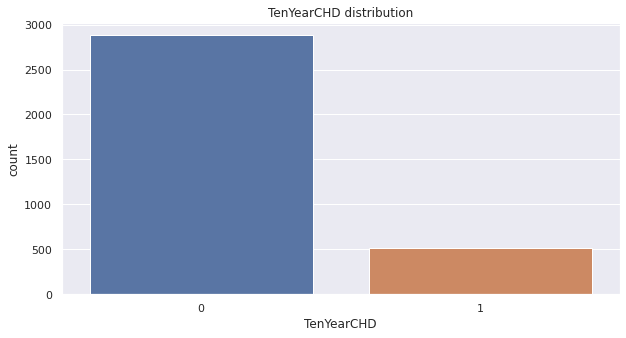

In [ ]:
# Distribution of dependent varaible - TenYearCHD

plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')

**The dependent variable - 10 year risk of CHD is unbalanced.**

In [ ]:
# Distribution of dependent variable
df[dependent_var].value_counts()

TenYearCHD
0             2879
1              511
dtype: int64

In [ ]:
# unbalanced distribution
511/(2879+511)

0.15073746312684366

**The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.**

## **Analyzing the distribution of the continuous independent variables:**


---



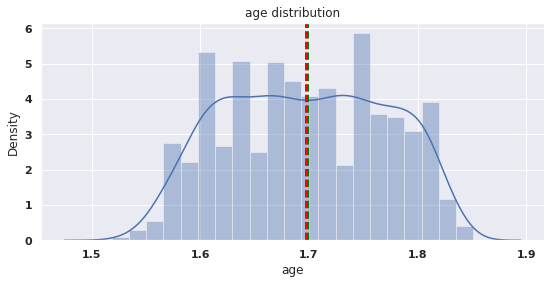

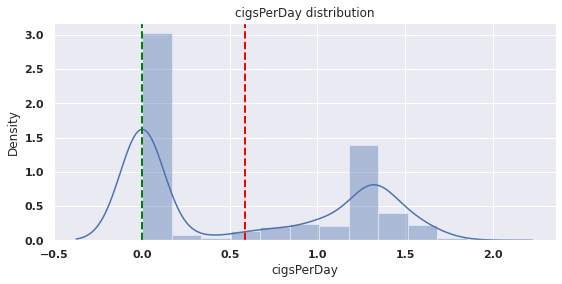

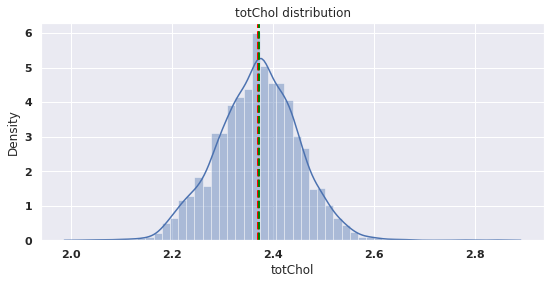

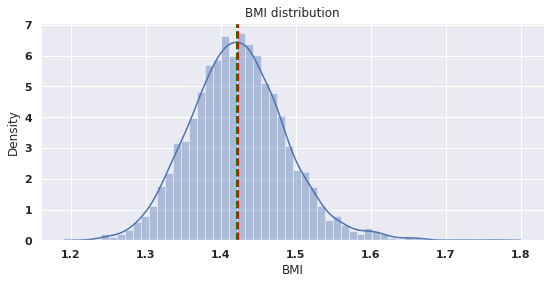

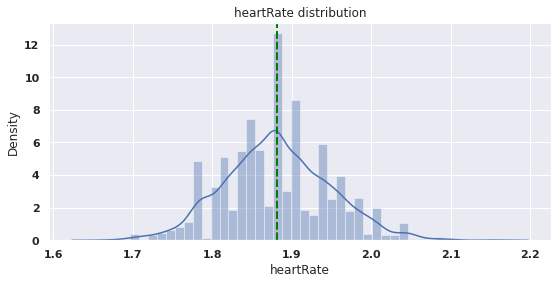

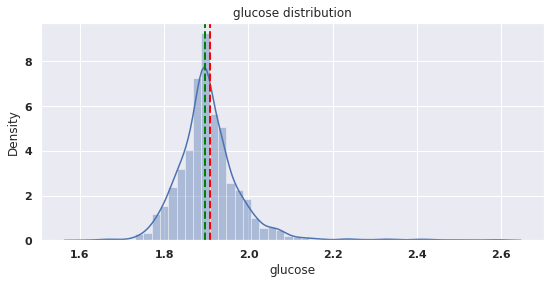

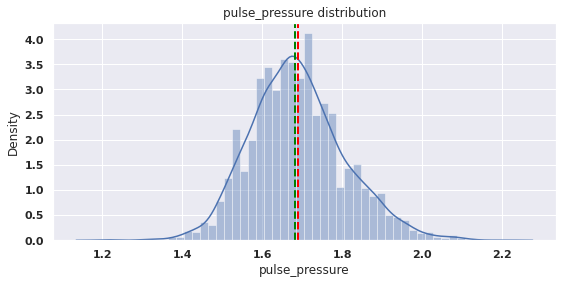

In [ ]:
# Analysing the distribution of continuous variables in the dataset

for col in continuous_var:
  plt.figure(figsize=(9,4))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**The distribution of several features is skewed, and contains outliers.**

### **Using IQR method**


---



In [ ]:
# Handling outliers by standard methods and Plotting graphs:

pk1 = df.copy()
for col in numeric_features:


  # Using IQR method to define the range of inliners:

  q1, q3, median = pk1[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  

  # Replacing Outliers with median value:

  pk1[col] = np.where(pk1[col] > upper_limit, median,np.where(
                         pk1[col] < lower_limit,median,pk1[col]))

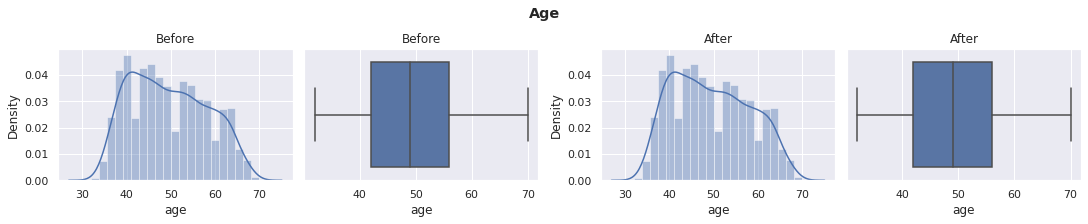

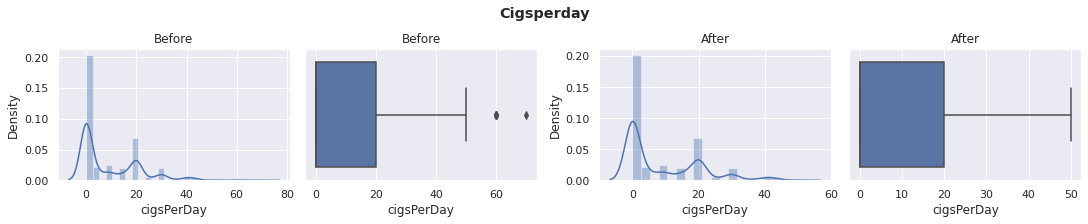

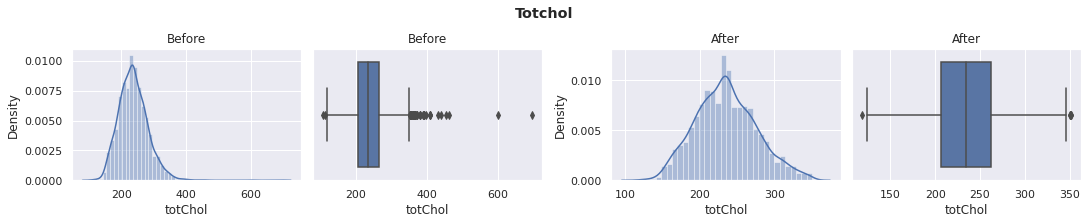

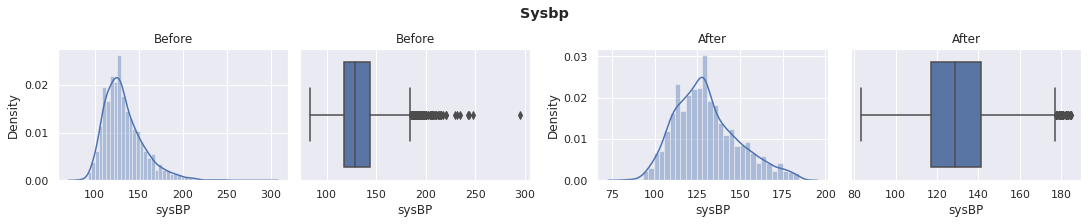

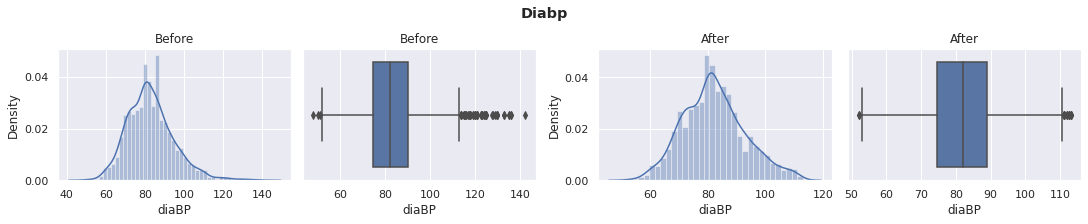

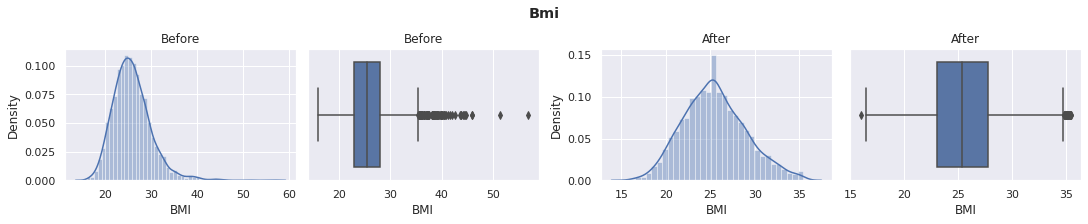

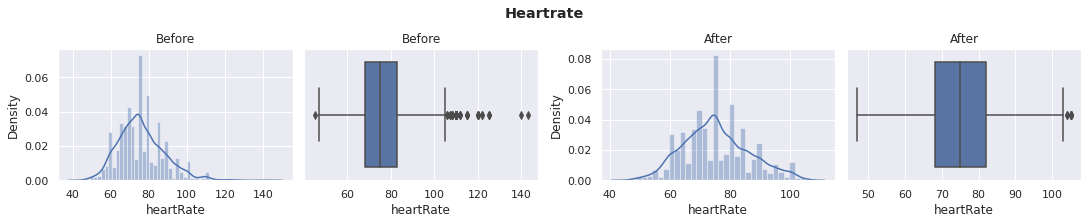

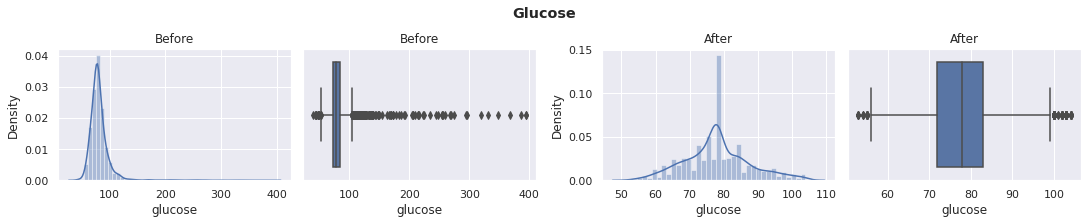

In [ ]:
# After treating outliers :

for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")


  # After treating outliers :
  
  sns.distplot(pk1[col], ax=ax[2]).set(title="After")
  sns.boxplot(pk1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## **Analyzing the distribution of the discrete independent variables:**


---



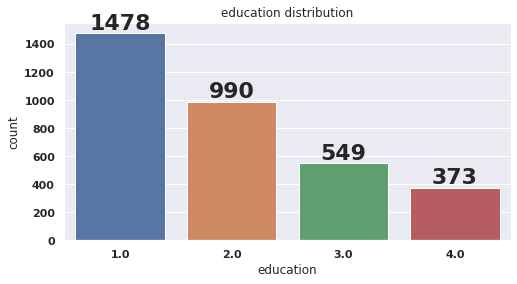

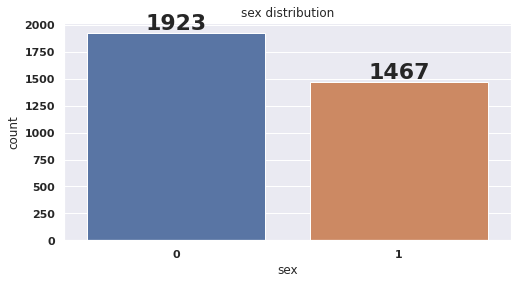

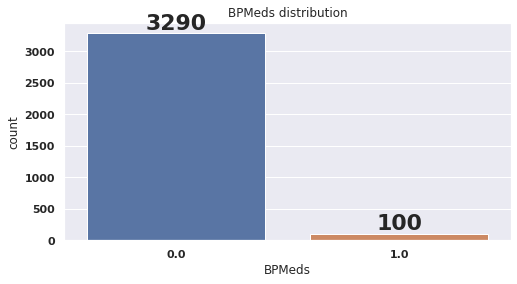

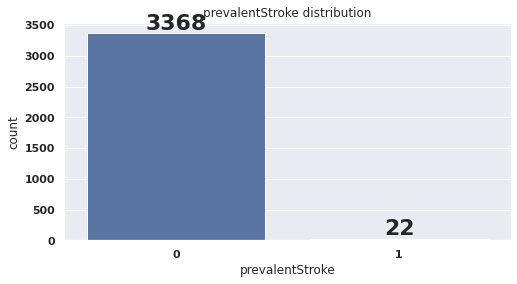

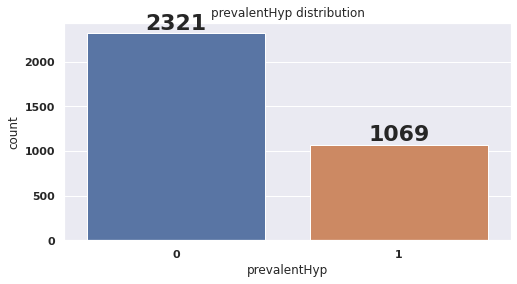

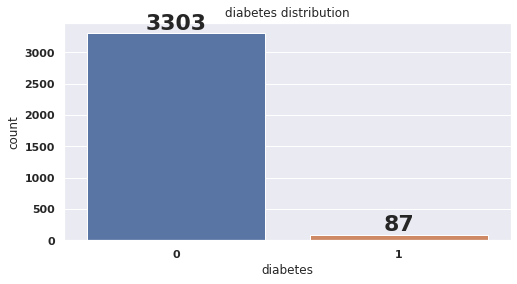

In [ ]:
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(8,4))
  p = sns.countplot(df[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()


* **Almost half the patients are smokers.**
* **100 patients under the study are undertaking blood pressure medication.**
* **22 patients under the study have experienced a stroke.**
* **1069 patients have hypertension.**
* **87 patients have diabetes.**

## **Analyzing the relationship between the dependent variable and the continuous variables in the data:**


---



<Figure size 720x360 with 0 Axes>

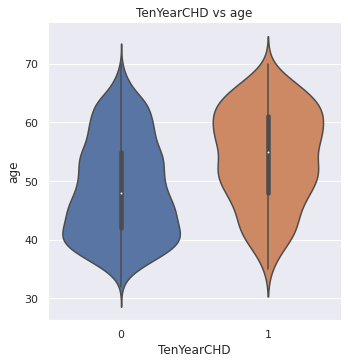

<Figure size 720x360 with 0 Axes>

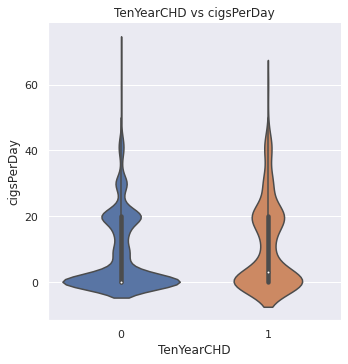

<Figure size 720x360 with 0 Axes>

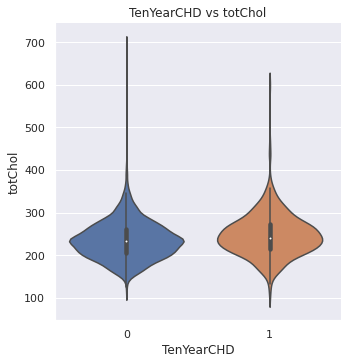

<Figure size 720x360 with 0 Axes>

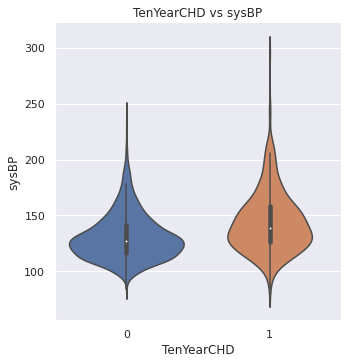

<Figure size 720x360 with 0 Axes>

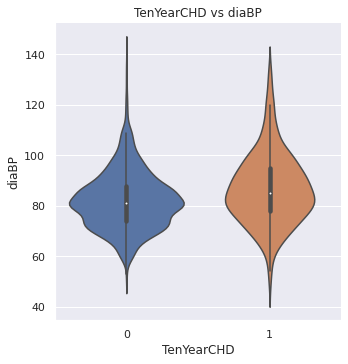

<Figure size 720x360 with 0 Axes>

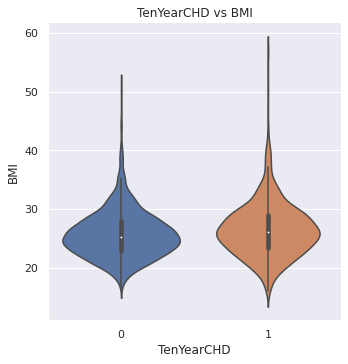

<Figure size 720x360 with 0 Axes>

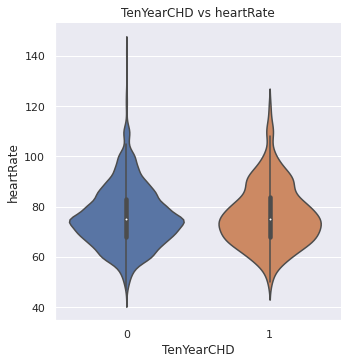

<Figure size 720x360 with 0 Axes>

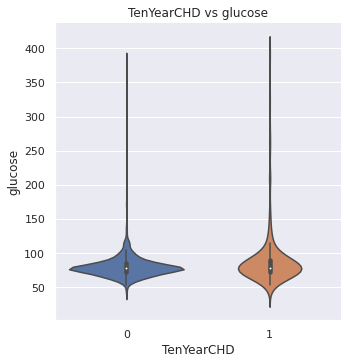

In [ ]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()


* **The risk of CHD is higher for older patients than younger patients.**
* **No conclusive evidence on the risk of CHD with other continuous variables**

### **100% stacked bar chart of categorical values**


---



<Figure size 720x360 with 0 Axes>

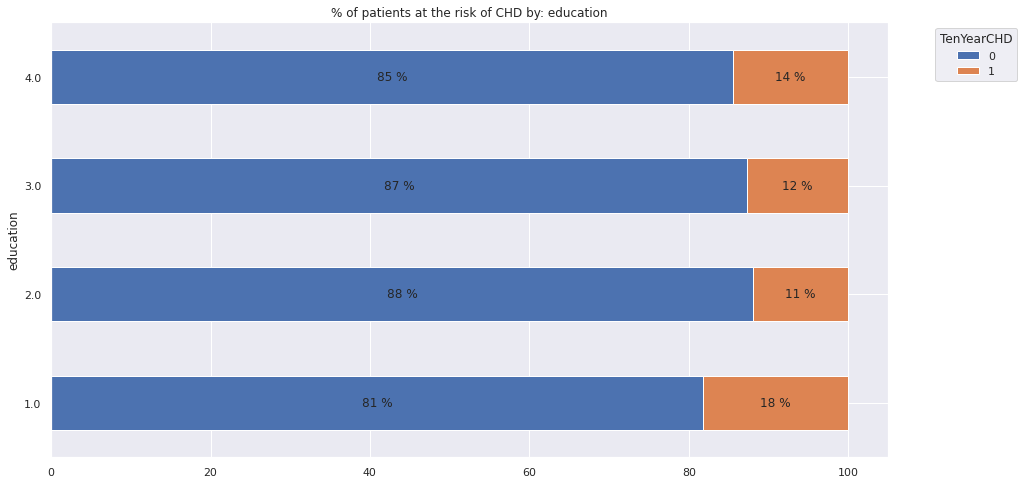

<Figure size 720x360 with 0 Axes>

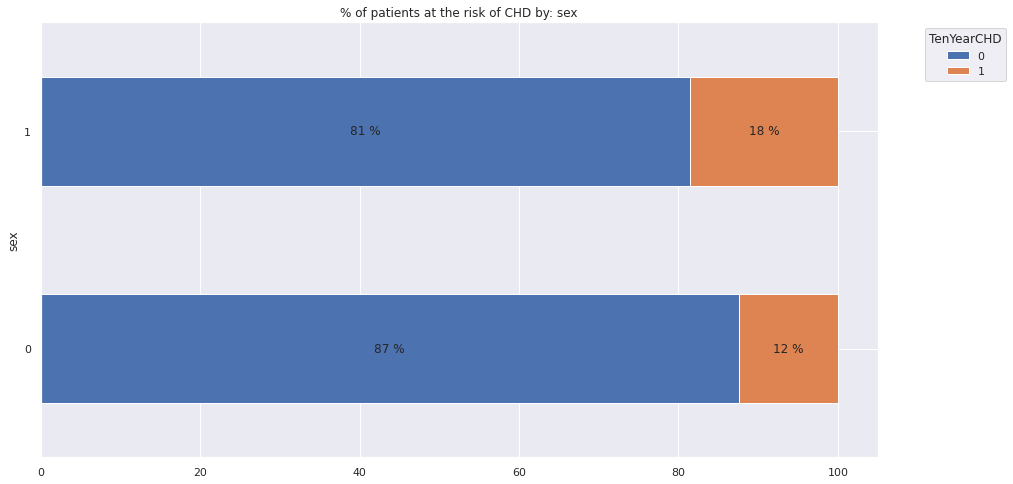

<Figure size 720x360 with 0 Axes>

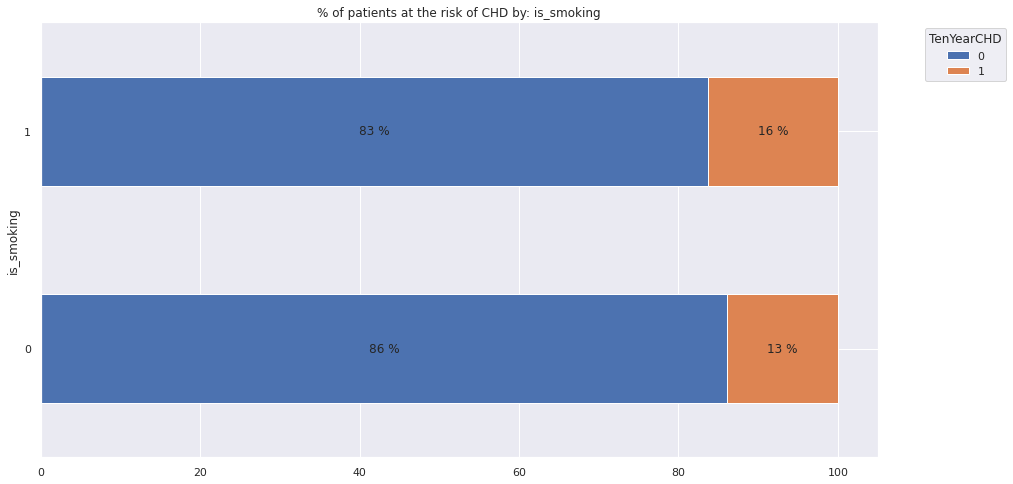

<Figure size 720x360 with 0 Axes>

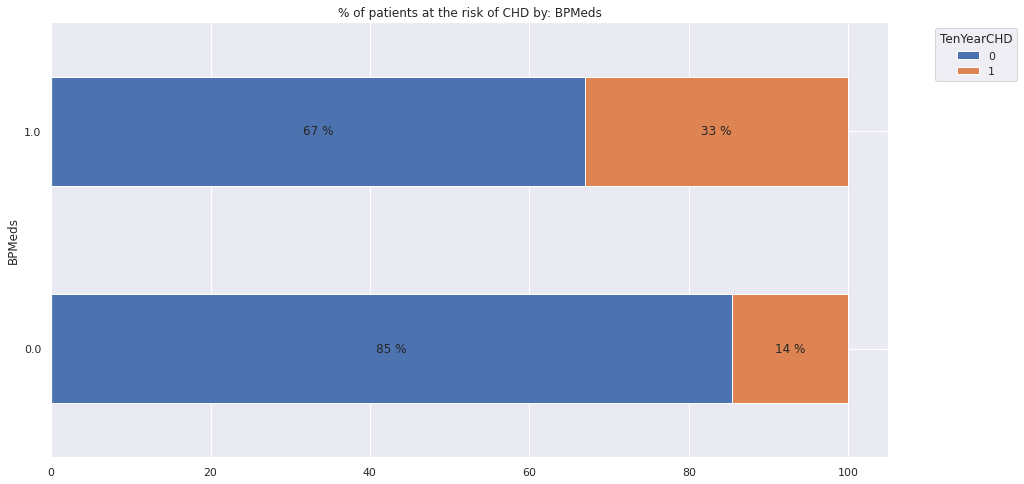

<Figure size 720x360 with 0 Axes>

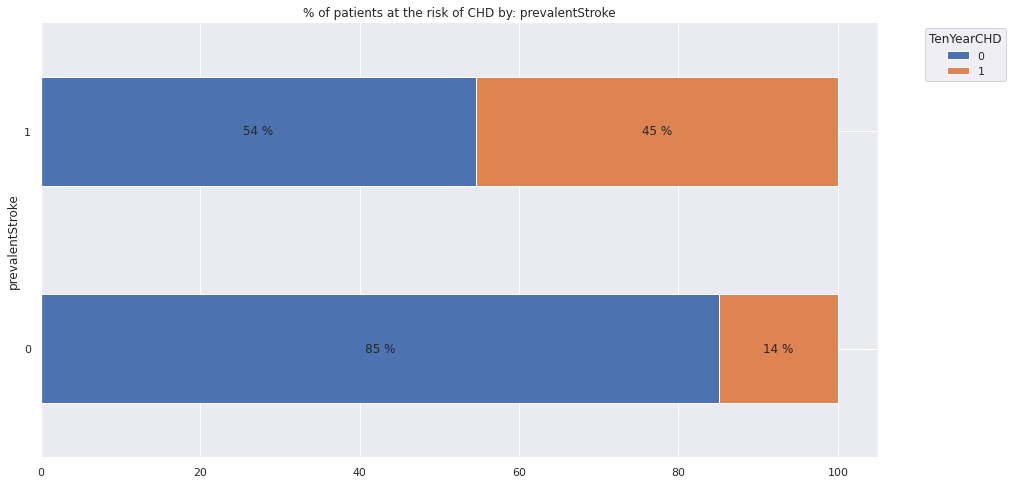

<Figure size 720x360 with 0 Axes>

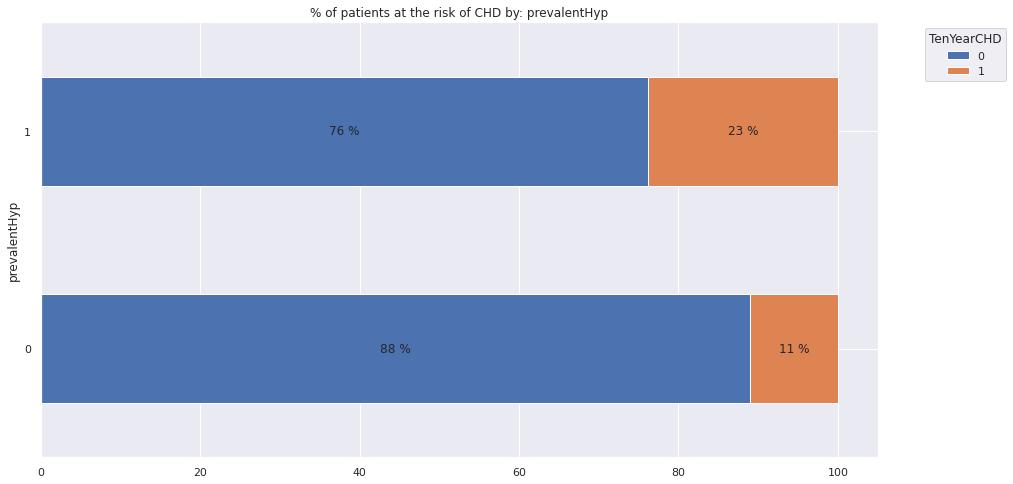

<Figure size 720x360 with 0 Axes>

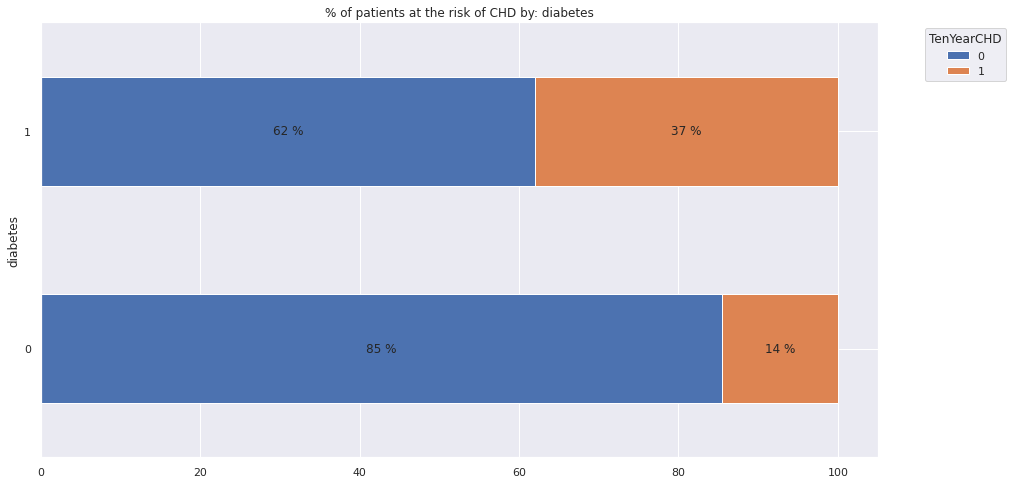

In [ ]:
# 100% stacked bar chart

for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()


* **18%, 11%, 12%, 14% of the patients belonging to the education level 1, 2, 3, 4 respectively were eventually diagnosed with CHD.**
* **Male patients have significantly higher risk of CHD (18%) than female patients (12%)**
* **Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)**
* **Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)**
* **Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)**
* **Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)**
* **Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)**

## **Correlation analysis:**


---



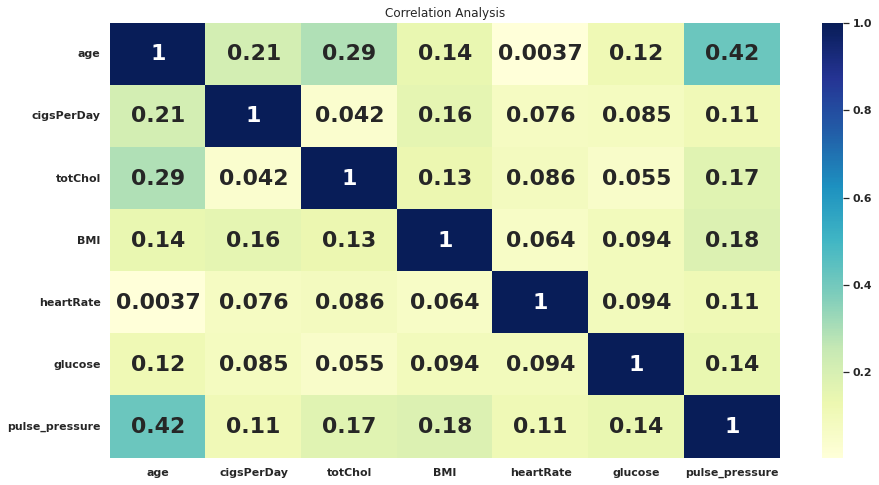

In [ ]:
# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

* **Above is the correlation magnitude heatmap for all the continuous variables in the dataset.**
* **The variables systolic BP and diastolic BP are highly correlated.**

# **Feature Engineering:**


---



In [ ]:
# One Hot Encoding 

df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
# creating a list with all the numerical features

numerical_columns  = [i for i in df.columns if len(df[i].unique())>25]
print(list(numerical_columns))

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# Lets check the discrete and continuous features :

categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)
     

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# looking at the unique values of each column in categorical columns

for feature in categorical_features:
    print(feature,':')
    print(df[feature].value_counts())
    print(".............................................")

education :
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
.............................................
sex :
0    1923
1    1467
Name: sex, dtype: int64
.............................................
is_smoking :
0    1703
1    1687
Name: is_smoking, dtype: int64
.............................................
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
.............................................
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
.............................................
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
.............................................
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64
.............................................
TenYearCHD :
0    2879
1     511
Name: TenYearCHD, dtype: int64
.............................................


## **Handling Multicollinearity:**


---



In [ ]:
# Range of systolic bp and diastolic bp

print(df['sysBP'].min(),df['sysBP'].max())
print(df['diaBP'].min(),df['diaBP'].max())

83.5 295.0
48.0 142.5


To handle multicollinearity between these two independent continuous variables, we can replace these two columns with a new variable 'pulse pressure', which is given as follows:


---



**Pulse Pressure = Systolic BP - Diastolic BP**


---


Pulse pressure is the difference between the upper and lower numbers of your blood pressure. This number can be an indicator of health problems before you develop symptoms. Your pulse pressure can also sometimes that you’re at risk for certain diseases or conditions.


---



From the above resource, we also found that:
* The normal pulse pressure is around 40 mmHg
* Pulse pressures of 50 mmHg or more can increase the risk of heart disease, heart rhythm disorders, stroke and more.
* Higher pulse pressures are also thought to play a role in eye and kidney damage from diseases like diabetes.
* Low pulse pressure - is where the pulse pressure is one-fourth or less of the systolic blood pressure.
* This happens when your heart isn’t pumping enough blood, which is seen in heart failure and certain heart valve diseases. It also happens when a person has been injured and lost a lot of blood or is bleeding internally.

### **Creating New Features**


---



In [ ]:
# Creating a new column pulse_pressure
# and dropping sysBP and diaBP

df['pulse_pressure'] = df['sysBP']-df['diaBP']
df.drop('sysBP',axis=1,inplace=True)
df.drop('diaBP',axis=1,inplace=True)

In [ ]:
# columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'pulse_pressure'],
      dtype='object')

In [ ]:
# Updating the continuous_var list

continuous_var.remove('sysBP')
continuous_var.remove('diaBP')
continuous_var.append('pulse_pressure')

Text(0.5, 1.0, 'Pulse Pressure Distribution')

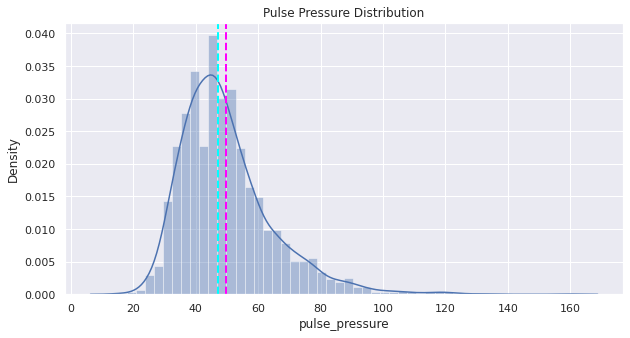

In [ ]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

**The pulse pressures are positively skewed**

<Figure size 720x360 with 0 Axes>

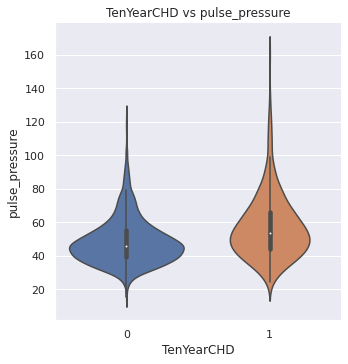

In [ ]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df,kind='violin')
plt.title('TenYearCHD vs pulse_pressure')
plt.show()

**On average, the patients with higher pulse pressure are exposed to the coronary heart disease over the period of 10 years.**

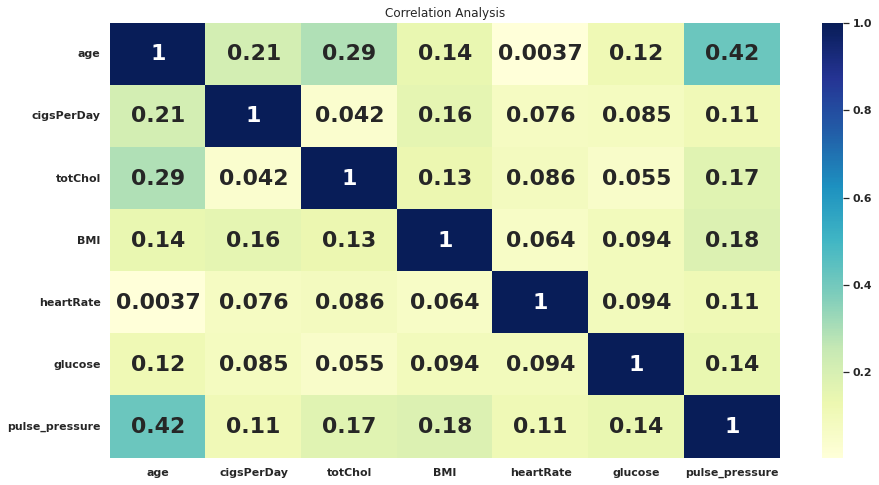

In [ ]:
# Updated correlations
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

**We were successful in handling multicollinearity amongst the continuous variables in the dataset.**

## **Discrete feature selection:**


---



### **Hypothesis Testing**


---



To check whether discrete variables are related, chi2 test can be used. We define:
1. **Null Hypothesis (H0): Two variables are independent.**
2. **Alternate Hypothesis (H1): Two variables are not independent.** 

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

In [ ]:
# chi2 scores
chi_scores = chi2(df[categorical_var],df[dependent_var])
chi_scores

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

In [ ]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking         1.588409e-01
education          2.909740e-02
sex                2.056887e-04
prevalentStroke    6.813318e-05
BPMeds             5.436407e-07
diabetes           2.542262e-09
prevalentHyp       1.027137e-15
dtype: float64

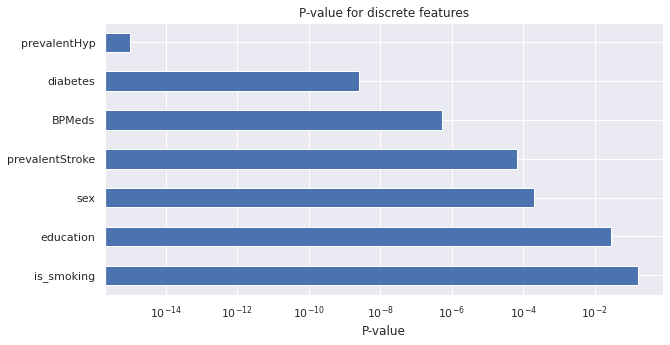

In [ ]:
# Plotting p values for chi2 test for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

* **Since prevalent hypertension column (prevalentHyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines  the outcome of the dependent variable.**
* **The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).**
* **We can drop this column since we already have a column cigsPerDaywhich gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.**

### **Dropping Columns**

In [ ]:
# dropping is_smoking
df.drop('is_smoking',axis=1,inplace=True)

In [ ]:
# dropping is smoking 
categorical_var.remove('is_smoking')
categorical_var

['education', 'sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

### **Performing Log Transformation**


---



**Many continuous variables are skewed. By log transformation, we aim to reduce the magnitude of skew in these variables to a certain extent.**

In [ ]:
# Implementing log transformation on continuous variables

df['age']                   = np.log10(df['age']+1)
df['cigsPerDay']          = np.log10(df['cigsPerDay']+1)
df['totChol']     = np.log10(df['totChol']+1)
df['BMI']                   = np.log10(df['BMI']+1)
df['heartRate']            = np.log10(df['heartRate']+1)
df['glucose']               = np.log10(df['glucose']+1)
df['pulse_pressure']        = np.log10(df['pulse_pressure']+1)

In [ ]:
# Checking skew after log transformation
df[continuous_var].skew(axis = 0)

age              -0.015053
cigsPerDay        0.301771
totChol           0.011860
BMI               0.370422
heartRate         0.165898
glucose           2.411348
pulse_pressure    0.354174
dtype: float64

## **Analyzing the distribution of transformed features:**


---



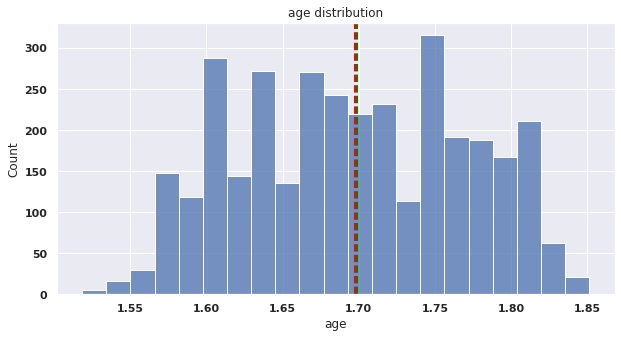

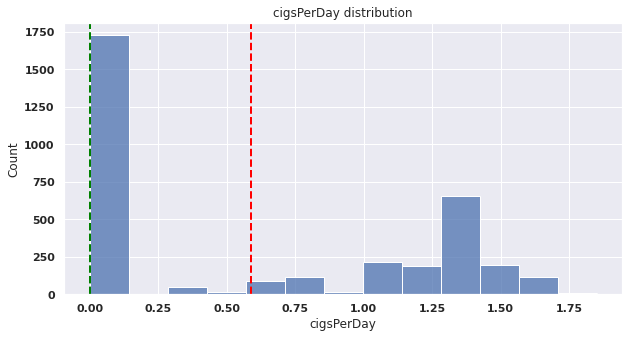

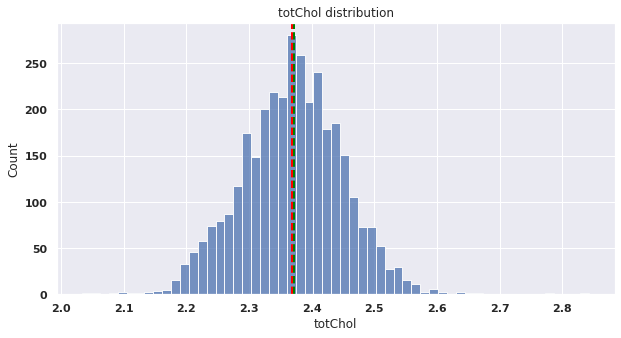

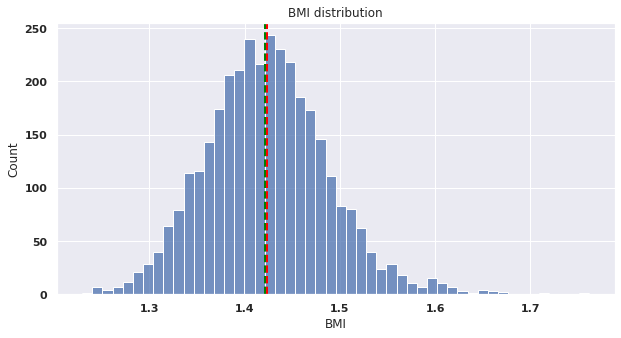

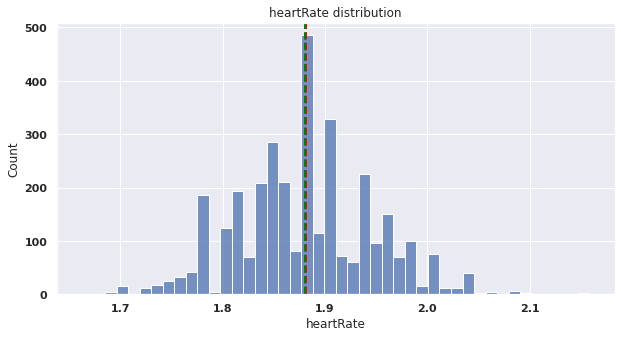

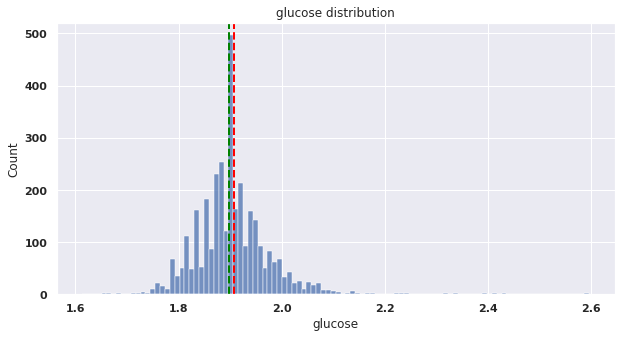

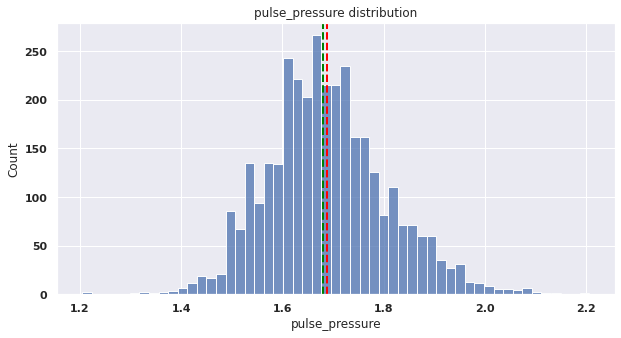

In [ ]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**Except cigsPerDay, we have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.**

## **Checking for outliers in transformed features:**


---



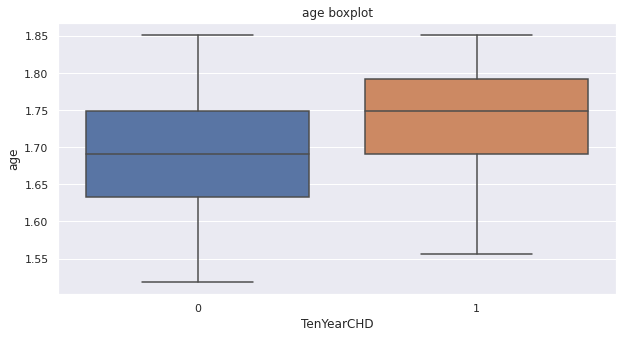

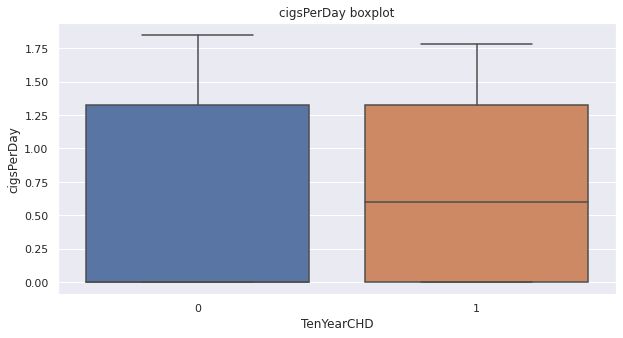

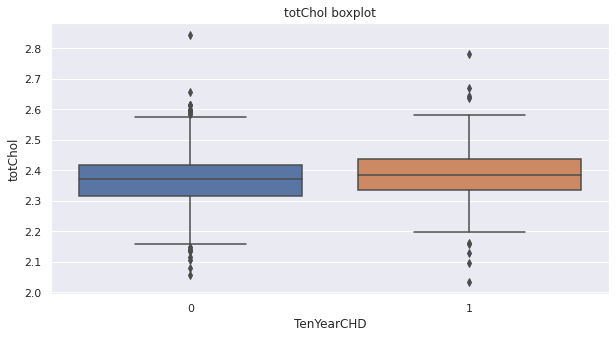

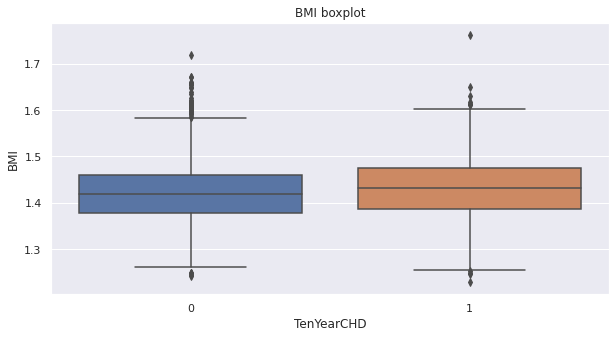

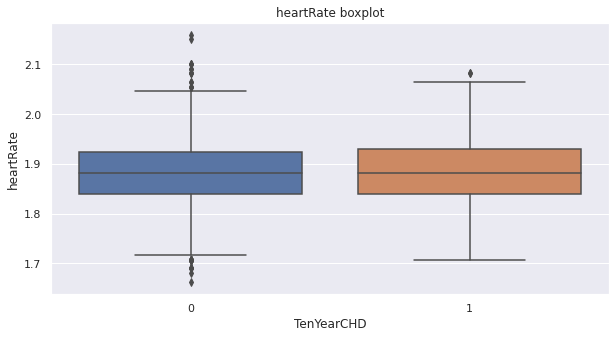

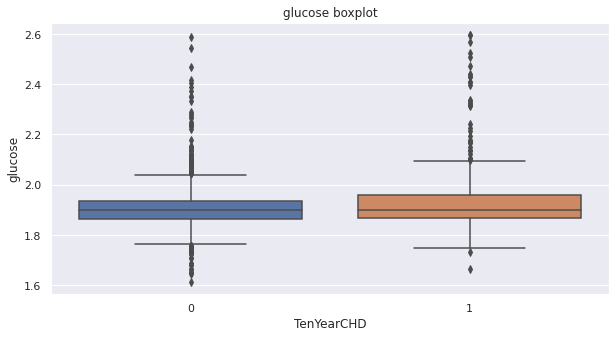

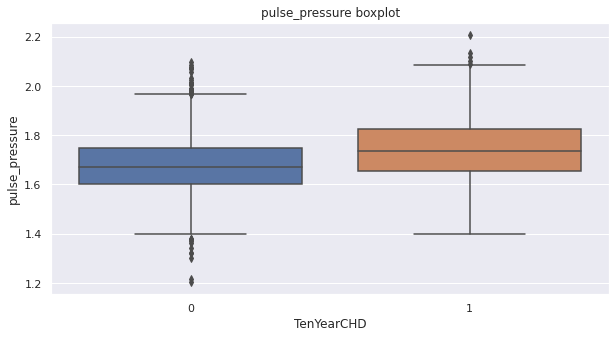

In [ ]:
# checking for outliers in log transformed features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()

* **Except for age and cigsPerDay columns, rest of the numerical columns contain outliers even after log transformation.**
* **To handle this, we can impute the outliers beyond 3 standard deviations from the mean with its median value on the train data.**

# **Data Preprocessing:**


---



In [ ]:
# Defining dependent and independent variables
X = df.drop('TenYearCHD',axis=1)
y = df[dependent_var]

## **Choice of prediction model:**


---



* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* Try other standard binary classification models like  K nearest neighbors, Naive Bayes, decision tree classifier, and support vector machines.
* Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

## **Evaluation metrics:**


---


* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Recall** as the model evaluation metric.


---




\begin{align}
        Recall = \frac{True Positive}{True Positive + False Negative}
    \end{align}

---    

In [ ]:
# function to get recall score
def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

## **Train Test Split:**

* Since we are working with limited amount of data, ie, around 3390 records, **30%** of the records are set aside for testing, 70%  for training.
* Since the data is imbalanced, **stratified split** was employed to get almost equal proportion of dependent variables in the train and test sets.



---



In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

TenYearCHD
0             2015
1              358
dtype: int64

In [ ]:
# Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [ ]:
# Checking the test distribution of dependent variable
y_test.value_counts()

TenYearCHD
0             864
1             153
dtype: int64

In [ ]:
# Proportion of positive outcomes in test dataset
153/(153+864)

0.1504424778761062

**The train and test set contain almost equal proportion of results.**

## **Handling outliers in the train data:**


---



Inputing the outliers in 'totChol', 'BMI', 'heartRate', 'glucose', 'pulse_pressure' beyond 3 standard deviations from the mean with its median value.

In [ ]:
# imputing the outliers beyond 3 standard deviations from the mean with its median value
for i in ['totChol', 'BMI', 'heartRate', 'glucose','pulse_pressure']:
  upper_lim = X_train[i].mean() + 3 * X_train[i].std()
  lower_lim = X_train[i].mean() - 3 * X_train[i].std()
  X_train.loc[(X_train[i] > upper_lim),i] = X_train[i].median()
  X_train.loc[(X_train[i] < lower_lim),i] = X_train[i].median()

In [ ]:
X_train[continuous_var].skew(axis = 0)

age              -0.035936
cigsPerDay        0.330724
totChol          -0.046628
BMI               0.215412
heartRate         0.074472
glucose           0.423891
pulse_pressure    0.270388
dtype: float64

**We were successsful in handling outliers in the train data, and thereby reducing skew.**

## **Oversampling:**
* Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
* This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.


---



### **Using SMOTE (Synthetic Minority Oversampling Technique)**


---



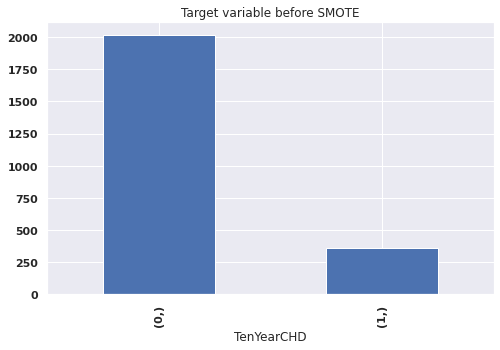

In [ ]:
# visualize the target variable before SMOTE
plt.figure(figsize = (8,5))
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [ ]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2373
Samples in the resampled dataset 4030


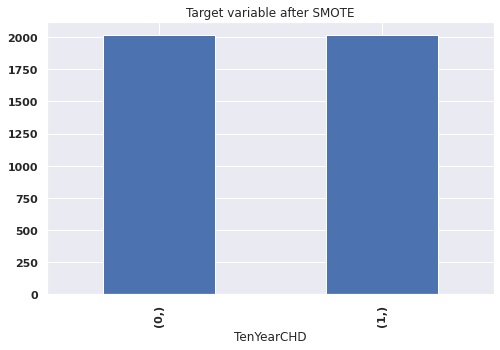

In [ ]:
# visualize the target variable after SMOTE
plt.figure(figsize = (8,5))
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

**We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.**

## **Scaling the data:**
* Since the predictions from the distance based models will get affected if the attributes are in different ranges, we need to scale them.
* We can use StandardScaler to scale down the variables.
* The results obtained from scaling can be stored and used while building those models.
* Tree algorithms do not necessarily require scaling.



---



### **Standard Scaling**


---



In [ ]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
# Scaled train values
X_train_scaled.head()

age  education       sex  cigsPerDay    BPMeds  prevalentStroke  \
0  1.352753   1.042877  1.126340    1.171992 -0.178155        -0.087426   
1  0.238381  -0.929033  1.126340    1.438531 -0.178155        -0.087426   
2  0.872536  -0.929033  1.126340    1.171992 -0.178155        -0.087426   
3  1.444209  -0.929033 -0.887831   -0.911595 -0.178155        -0.087426   
4  0.457551  -0.929033 -0.887831    1.171992 -0.178155        -0.087426   

   prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0     -0.685091 -0.171759  0.279319 -0.546622  -0.267146 -0.503371   
1     -0.685091 -0.171759  0.165020  0.828332  -0.454995 -1.072428   
2     -0.685091 -0.171759  0.714396  0.670299  -0.175143  1.589983   
3      1.459660 -0.171759  2.429594  0.459589   0.841085  1.786968   
4     -0.685091 -0.171759  0.211021 -1.740096  -0.454995 -0.413036   

   pulse_pressure  
0        0.021221  
1       -0.058061  
2       -0.392623  
3        1.281191  
4        0.021221

In [ ]:
# scaled SMOTE values
X_smote_scaled.head()

age  education       sex  cigsPerDay    BPMeds  prevalentStroke  \
0  1.167157   1.113723  1.061437    1.122951 -0.209881        -0.080582   
1 -0.004549  -0.860117  1.061437    1.387047 -0.209881        -0.080582   
2  0.662233  -0.860117  1.061437    1.122951 -0.209881        -0.080582   
3  1.263318  -0.860117 -0.942119   -0.941541 -0.209881        -0.080582   
4  0.225898  -0.860117 -0.942119    1.122951 -0.209881        -0.080582   

   prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0     -0.821148 -0.171389  0.214240 -0.646950  -0.295793 -0.541904   
1     -0.821148 -0.171389  0.090347  0.790611  -0.493700 -1.133287   
2     -0.821148 -0.171389  0.685839  0.625383  -0.198863  1.633579   
3      1.217808 -0.171389  2.545014  0.405078   0.871778  1.838293   
4     -0.821148 -0.171389  0.140210 -1.894767  -0.493700 -0.448025   

   pulse_pressure  
0       -0.159268  
1       -0.240382  
2       -0.582673  
3        1.129812  
4       -0.159268

In [ ]:
# scaled test values
X_test_scaled.head()

age  education       sex  cigsPerDay    BPMeds  prevalentStroke  \
0 -1.761165   0.126803  1.061437    1.122951 -0.209881        -0.080582   
1 -0.753171   2.100643  1.061437    0.273452 -0.209881        -0.080582   
2 -1.455796   0.126803 -0.942119   -0.941541 -0.209881        -0.080582   
3 -0.367394  -0.860117 -0.942119   -0.941541 -0.209881        -0.080582   
4 -0.887376   0.126803 -0.942119    1.387047 -0.209881        -0.080582   

   prevalentHyp  diabetes   totChol       BMI  heartRate   glucose  \
0      1.217808 -0.171389  0.407325  0.783293   0.445052 -1.557288   
1      1.217808 -0.171389 -0.244212  0.904319  -1.812693  0.509152   
2     -0.821148 -0.171389 -1.472603 -1.390732  -0.493700  0.003350   
3     -0.821148 -0.171389  0.995311  0.451209  -0.295793 -0.173720   
4     -0.821148 -0.171389  0.214240 -0.332978  -1.122715  0.090231   

   pulse_pressure  
0       -0.765677  
1        0.952314  
2       -0.365277  
3        0.366027  
4       -0.450800

**We have successfully scaled down the variables using standard scaler.**

# **ML Model Implementation:**


---



## **Logistic Regression**


---



**Fitting, training and testing model along with classification reports**

In [ ]:
# Fitting model
lr_model = LogisticRegression()

In [ ]:
# training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [ ]:
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)

In [ ]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.7022332506203474

In [ ]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

In [ ]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.6797385620915033

In [ ]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       864
           1       0.27      0.68      0.39       153

    accuracy                           0.68      1017
   macro avg       0.60      0.68      0.58      1017
weighted avg       0.82      0.68      0.72      1017



### **Plotting Confusion Matrices**


---



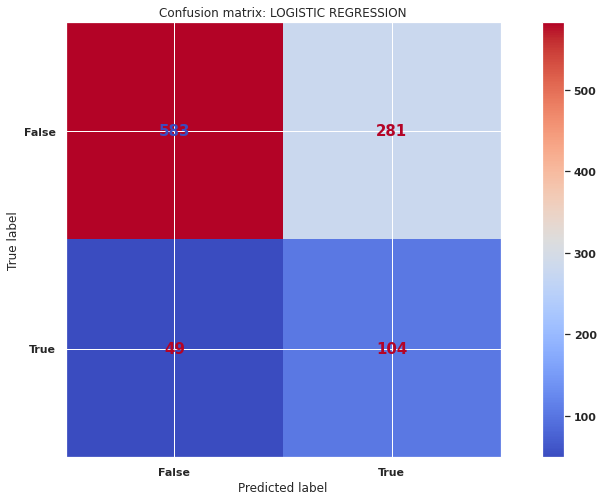

In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='coolwarm')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

**False negatives obtained after using logistic regression: 50**

## **K Nearest Neighbors:**


---



In [ ]:
# Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

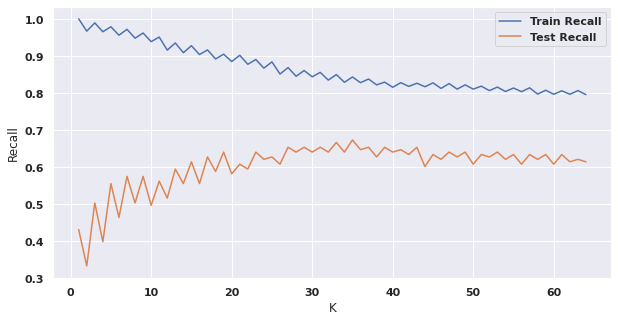

In [ ]:
# Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
# Best k is where the test recall is the highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

35

In [ ]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=35)

In [ ]:
# Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [ ]:
# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8431761786600497

In [ ]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [ ]:
# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.673202614379085

In [ ]:
# Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73       864
           1       0.23      0.67      0.35       153

    accuracy                           0.62      1017
   macro avg       0.57      0.64      0.54      1017
weighted avg       0.81      0.62      0.67      1017



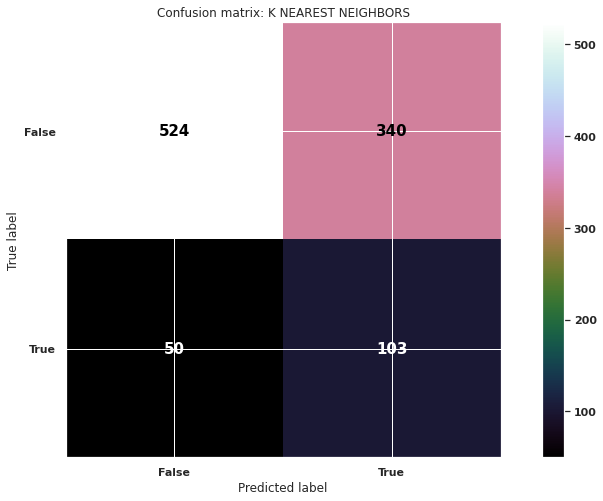

In [ ]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='cubehelix')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

**False negatives obtained after using KNN: 44**

## **Naive Bayes:**


---



In [ ]:
# Using stratified k fold cross validation so that each split 
# has almost equal proportion of classification results
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3, 
                                    random_state=0)

In [ ]:
# Fitting model
nb_model = GaussianNB()

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [ ]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [ ]:
# model best parameters
nb_best_params

{'var_smoothing': 1.0}

In [ ]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [ ]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [ ]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)

In [ ]:
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.5766749379652606

In [ ]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)

In [ ]:
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.5228758169934641

In [ ]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       864
           1       0.28      0.52      0.37       153

    accuracy                           0.73      1017
   macro avg       0.59      0.64      0.60      1017
weighted avg       0.81      0.73      0.76      1017



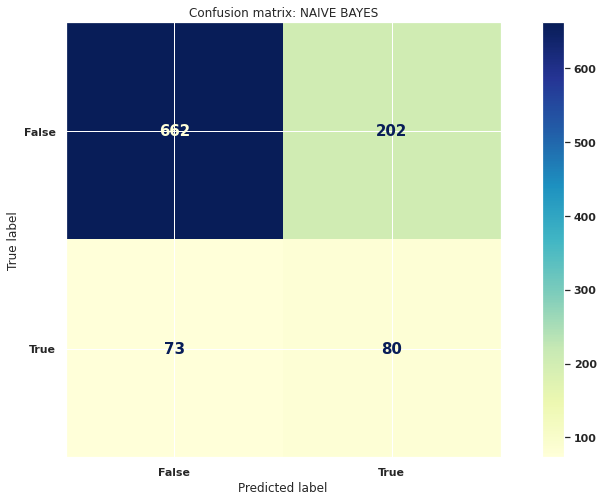

In [ ]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='YlGnBu')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

**False negatives obtained after using Naive Bayes: 72**

## **Decision tree:**


---



In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [ ]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
# model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [ ]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [ ]:
# training the model 
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [ ]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)

In [ ]:
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.8610421836228288

In [ ]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)

In [ ]:
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [ ]:
# Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       864
           1       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



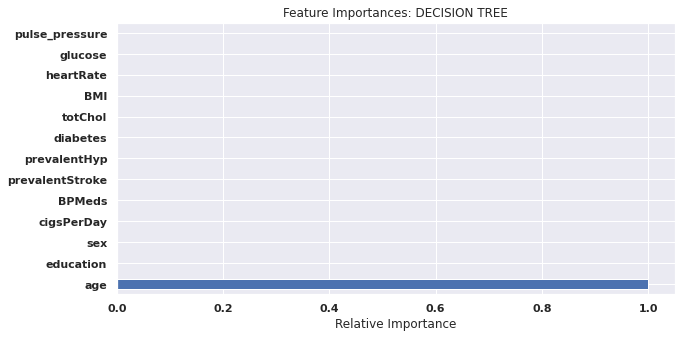

In [ ]:
# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

**Only one feature (age) was given imporatance while fitting a decision tree model. This is because of max depth being 1.**

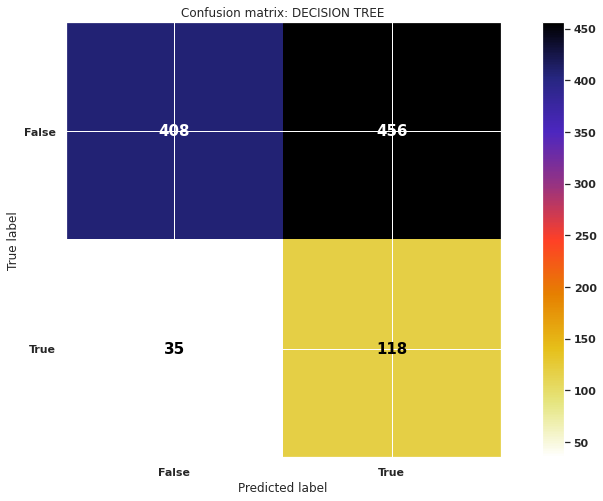

In [ ]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='CMRmap_r')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

**False negatives obtained after using decision tree: 35**

## **Support Vector Machines:**



---



In [ ]:
# SVM model parameters
from sklearn.svm import SVC
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [ ]:
# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [ ]:
# model best parameters
svm_best_params

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [ ]:
# training the model 
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=1, gamma=0.01)

In [ ]:
# Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)

In [ ]:
# training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.7379652605459057

In [ ]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.673202614379085

In [ ]:
# Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       864
           1       0.25      0.67      0.37       153

    accuracy                           0.65      1017
   macro avg       0.59      0.66      0.56      1017
weighted avg       0.82      0.65      0.70      1017



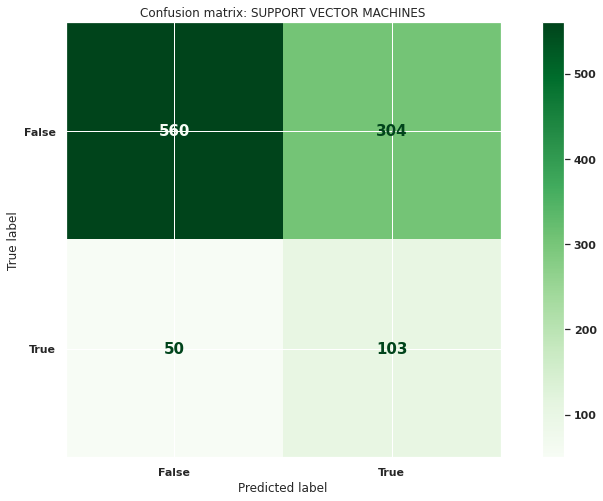

In [ ]:
# Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='Greens')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

**False negatives obtained after using SVM: 51**

## **Random forest:**


---



In [ ]:
# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
# using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# best parameters for random forests
rf_best_params

{'max_depth': 2,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
rf_model.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.1, min_samples_split=0.1,
                       n_estimators=500, random_state=0)

In [ ]:
# train predictions
rf_train_pred = rf_model.predict(X_smote)

In [ ]:
# train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall

0.7032258064516129

In [ ]:
# Test predictions
rf_test_pred = rf_model.predict(X_test)

In [ ]:
# test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall

0.6535947712418301

In [ ]:
# Classification report
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77       864
           1       0.26      0.65      0.37       153

    accuracy                           0.67      1017
   macro avg       0.59      0.66      0.57      1017
weighted avg       0.82      0.67      0.71      1017



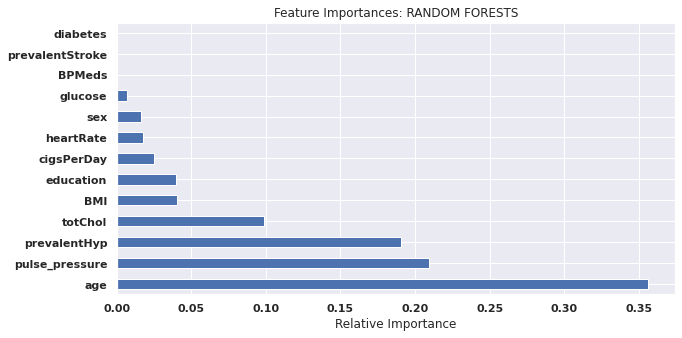

In [ ]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* **Features other than age are also given importance in this case insted of just one feature in case of decision tree.**
* **But age still remains the most important feature in predicting the final outcome for random forests.**

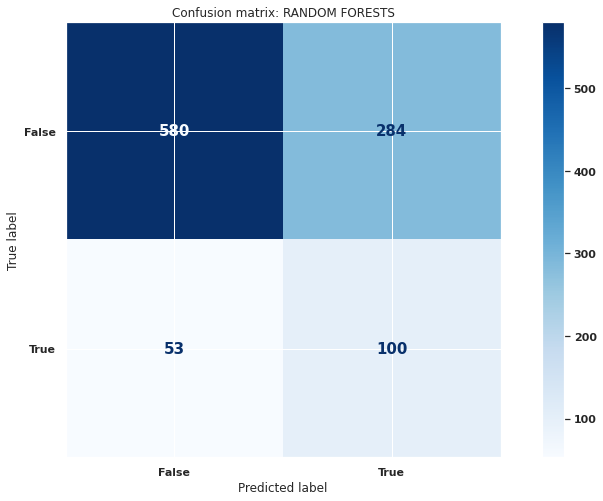

In [ ]:
# Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='Blues')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

**False negatives obtained after using Random forests: 54**

## **XG Boost:**


---



In [ ]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

In [ ]:
# best parameters for xgboost classifier
xgb_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
xgb_model.fit(X_smote_scaled,y_smote)

XGBClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
              n_estimators=500)

In [ ]:
# train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [ ]:
# train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

0.7930521091811414

In [ ]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [ ]:
# test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

0.6078431372549019

In [ ]:
# Classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78       864
           1       0.26      0.61      0.36       153

    accuracy                           0.67      1017
   macro avg       0.58      0.65      0.57      1017
weighted avg       0.81      0.67      0.72      1017



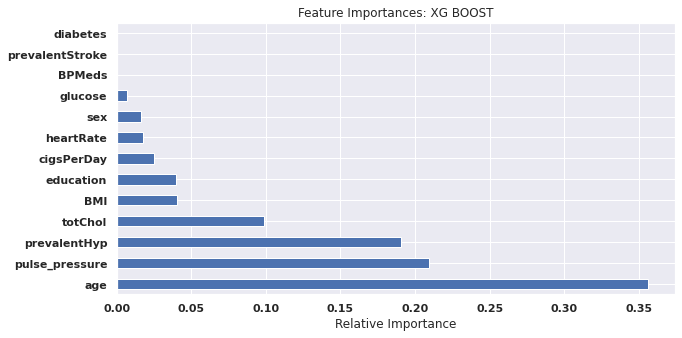

In [ ]:
# Feature importances

xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

* **Age in the most important feature in deciding the outcome of the variables for XG boost.**
* **Multiple features are given importance here rather than just one feature in case of decision tree.**

In [ ]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.91      0.69      0.78       864
    Positive       0.26      0.61      0.36       153

    accuracy                           0.67      1017
   macro avg       0.58      0.65      0.57      1017
weighted avg       0.81      0.67      0.72      1017



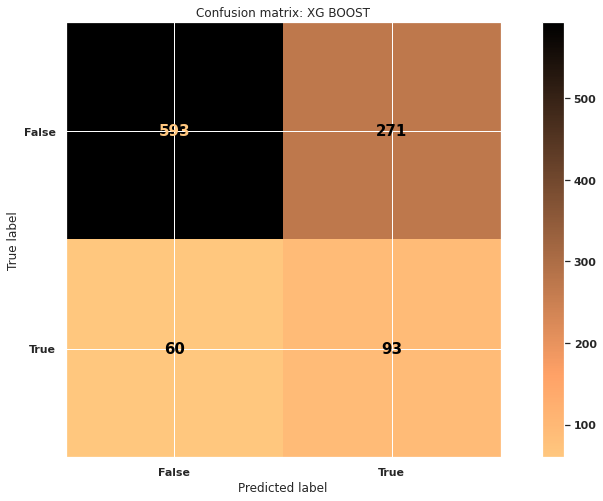

In [ ]:
# Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

cm_display.plot(cmap='copper_r')
plt.title('Confusion matrix: XG BOOST')
plt.show()

**False negatives obtained after using XG Boost: 59**

# **Results:**


---



The train and test recall scores obtained for different models built are as follows:

In [ ]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Classification Model', 'Train Recall (%)','Test Recall (%)'])
test.add_row(['1','Logistic Regression',lr_train_recall*100,lr_test_recall*100])
test.add_row(['2','K Nearest Neighbors',knn_train_recall*100,knn_test_recall*100])
test.add_row(['3','Naive Bayes',nb_train_recall*100,nb_test_recall*100])
test.add_row(['4','Decision Tree',dt_train_recall*100,dt_test_recall*100])
test.add_row(['5','Support Vector Machines',svm_train_recall*100,svm_test_recall*100])
test.add_row(['6','Random Forests',rf_train_recall*100,rf_test_recall*100])
test.add_row(['7','XG Boost',xgb_train_recall*100,xgb_test_recall*100])
print(test)

+---------+-------------------------+-------------------+-------------------+
| Sl. No. |   Classification Model  |  Train Recall (%) |  Test Recall (%)  |
+---------+-------------------------+-------------------+-------------------+
|    1    |   Logistic Regression   | 70.22332506203473 | 67.97385620915033 |
|    2    |   K Nearest Neighbors   | 84.31761786600497 |  67.3202614379085 |
|    3    |       Naive Bayes       | 57.66749379652606 | 52.28758169934641 |
|    4    |      Decision Tree      | 86.10421836228288 | 77.12418300653596 |
|    5    | Support Vector Machines | 73.79652605459057 |  67.3202614379085 |
|    6    |      Random Forests     |  70.3225806451613 |  65.359477124183  |
|    7    |         XG Boost        | 79.30521091811414 | 60.78431372549019 |
+---------+-------------------------+-------------------+-------------------+


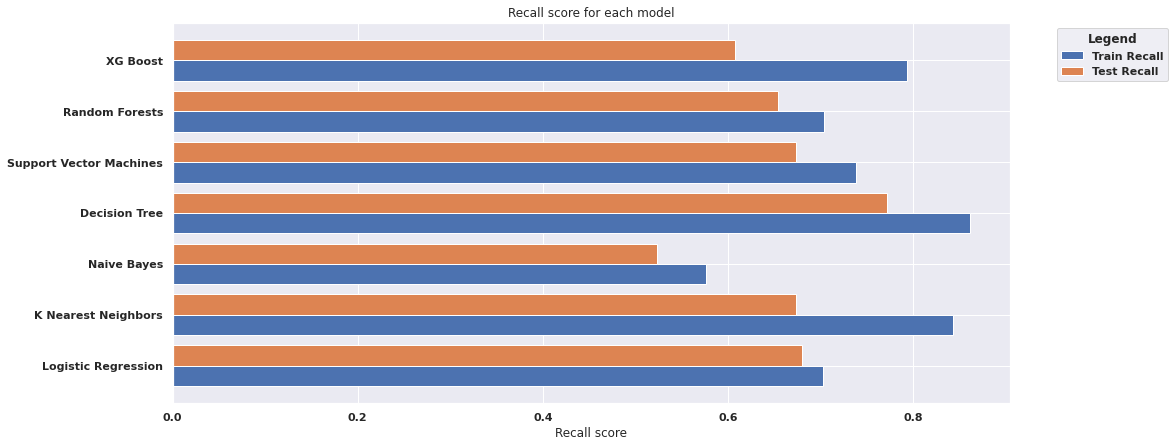

In [ ]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,rf_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,rf_test_recall,xgb_test_recall]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(15,7))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

* **The decision tree has the highest train and test recall score compared to other models built.**

# **Summary and Conclusions:**


---



## **EDA Insights**


---



- There are 15.1% people in our dataset are at a risk for cardiovascular disease and 84.9% people are safe.
- Around 500 patients are in risk and approx. 2800 patient are safe.
- There is more risk of cardiovascular disease in patients of age between 51 to 63
- Number of people who were not on BPmeds, who did not had a stroke in past
- Both sexes, in Age group of 50 and above have high risk of heart disease.
- Men above 45 years are usually at risk, where as women above 55 years are usually at risk.
- Men are more likely to have heart disease compared to women.
- Count of Middle aged people are highest followed by elderly
- Number of male smokers is higher than female smokers
- Most people smoke cigarettes between 1 to 10 approx. and their heart rate lies between 60 to 100
- The number of males and females which are at risk of CHD is equal.
- The number of females who are not at risk is higher than that of male
- Age lies between 32 to 70 and most of the people's systolic BP lies between 90 to 200
- Diabetic patients are at more risk of CHD.
- Out of all the people who are not Hypertensive, the number of people getting CHD is very less. 
- People who are hypertensive has more chances of getting CHD.
- Patients on BP medication are more prone to CHD where as those who are not on BP medication has severely less chances of getting CHD.
- The person who previously had a heart stroke are more at risk to CHD than those who did not.
- The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. 
- We can see same level of measures such as BP, BMI etc., for all age group.
- The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. 
- At the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.

- If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR

- The people who had the basic level education are at more risk of CVR when we compare the levels of education.

- Cholestrol level is high for fewer people in education level 2. But people who had basic education were at more risk of CVR.

- People with only the basic education are having more BP(considering sysBP,diaBP together), heartrate and BMI as well. So they are directly at more risk of CVR.

- People with the highest education (Education 4) are having controlled balanced glucose level. 
- Other fewer people with other education levels are having very high cholestrol. We can see a peak in glucose level in education leval 3 group people

- Females are having high BP, high heart rate, high BMI and even high values of glucose. But the females who are between the age group of 50-70 are at more risk of CVR.

- Males between the age group 40-70 are at more risk of CVR.

- Whoever had the highest glucose level amongst men all comes under the risk of CVR.

- We can see that some of the highest cholestrol values are obtained by men (alone). This might be the reason that they are at high risk of CVR.

- But many men maintained normal range of BP, heartrate and BMI.

## **Conclusion**


---



- We trained 7 Machine Learning models using the training dataset, and hyperparameter tuning was used in some models to improve the model performance.
- To build the models, missing values were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.
- Recall was chosen as the model evaluation metric because it was very important that we reduce the false negatives.
- Initial set of predictions were obtained using the baseline model, ie, logistic regression model, and other commonly used classification models were also build in search of better predictions.
- From our analysis, it is also found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure, prevalent hypertension and total cholesterol.
- Diabetes, prevalent stroke and BP medication were the least important features in determining the risk of CHD

## **Overall Summary**


---



* Predicting the risk of coronary heart disease is critical for reducing fatalities caused by this illness. We can avert deaths by taking the required medications and precautions if we can foresee the danger of this sickness ahead of time.
* It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.
* We were able to create a model with a recall of just 0.77 because of limitated data available and limited computational power availabe.
* A recall score of 0.77 indicates that out of 100 individuals with the illness, our model will be able to classify only 77 as high risk patients, while the remaining 33 will be misclassified.
* Future developments must include a strategy to improve the model recall score, enabling us to save even more lives from this disease. This includes involving more people in the study, and include people with different medical history, etc build an application with better recall score.